# Equipo 21
## Integrantes:
1. José Arturo Valdivia Rivera - A01795395
2. Abraham Esses Cohen - A01018853
3. Diego Audiffred Mayoral - A01732823


# Avance 1: Análsis EDA (Exploración de datos)

In [ ]:
# Carga de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# Lectura de datos
path = 'BD_consolidada.csv'
data = pd.read_csv(path)

## Análisis de dataframe

In [ ]:
data.head(10)

id     codigo  empresa  \
0     2017eneroSANTA CRUZRestoGaseosas330NO RETORNABLE  2017enero  Nielsen   
1        2017eneroSANTA CRUZRestoGaseosas620RETORNABLE  2017enero  Nielsen   
2    2017eneroSANTA CRUZRestoGaseosas1000NO RETORNABLE  2017enero  Nielsen   
3    2017eneroSANTA CRUZRestoGaseosas2000NO RETORNABLE  2017enero  Nielsen   
4    2017eneroSANTA CRUZRestoGaseosas3000NO RETORNABLE  2017enero  Nielsen   
5    2017eneroSANTA CRUZRestoGaseosas3100NO RETORNABLE  2017enero  Nielsen   
6   2017eneroSANTA CRUZRestoAgua Plana600NO RETORNABLE  2017enero  Nielsen   
7  2017eneroSANTA CRUZRestoAgua Plana1000NO RETORNABLE  2017enero  Nielsen   
8  2017eneroSANTA CRUZRestoAgua Plana2000NO RETORNABLE  2017enero  Nielsen   
9  2017eneroSANTA CRUZRestoAgua Plana2200NO RETORNABLE  2017enero  Nielsen   

       mercado  anio    mes   operacion fab_nartd categoria_embol  tamanio  \
0  Tradicional  2017  enero  SANTA CRUZ     Resto        Gaseosas      330   
1  Tradicional  2017  enero  SANTA CRUZ     Resto        Gaseosas      620   
2  Tradicional  2017  enero  SANTA CRUZ     Resto        Gaseosas     1000   
3  Tradicional  2017  enero  SANTA CRUZ     Resto        Gaseosas     2000   
4  Tradicional  2017  enero  SANTA CRUZ     Resto        Gaseosas     3000   
5  Tradicional  2017  enero  SANTA CRUZ     Resto        Gaseosas     3100   
6  Tradicional  2017  enero  SANTA CRUZ     Resto      Agua Plana      600   
7  Tradicional  2017  enero  SANTA CRUZ     Resto      Agua Plana     1000   
8  Tradicional  2017  enero  SANTA CRUZ     Resto      Agua Plana     2000   
9  Tradicional  2017  enero  SANTA CRUZ     Resto      Agua Plana     2200   

  retornabilidad        venta venta_pcs  indice_general  \
0  NO RETORNABLE   1,070,962    21,305       268.331751   
1     RETORNABLE   1,102,862    51,855       268.331751   
2  NO RETORNABLE     182,454     6,146       268.331751   
3  NO RETORNABLE     453,455    18,692       268.331751   
4  NO RETORNABLE     158,819     8,202       268.331751   
5  NO RETORNABLE      19,123       949       268.331751   
6  NO RETORNABLE       4,487       119       268.331751   
7  NO RETORNABLE      58,362     2,141       268.331751   
8  NO RETORNABLE      83,757     4,210       268.331751   
9  NO RETORNABLE       1,987        96       268.331751   

   agricultura,_pecuario,_silvicultura,_caza_y_pesca  \
0                                         152.343626   
1                                         152.343626   
2                                         152.343626   
3                                         152.343626   
4                                         152.343626   
5                                         152.343626   
6                                         152.343626   
7                                         152.343626   
8                                         152.343626   
9                                         152.343626   

   petroleo_crudo_y_gas_natural  minerales_metálicos_y_no_metálicos  \
0                    330.714407                           231.46535   
1                    330.714407                           231.46535   
2                    330.714407                           231.46535   
3                    330.714407                           231.46535   
4                    330.714407                           231.46535   
5                    330.714407                           231.46535   
6                    330.714407                           231.46535   
7                    330.714407                           231.46535   
8                    330.714407                           231.46535   
9                    330.714407                           231.46535   

   industria_manufacturera  alimentos,_bebidas_y_tabaco  otras_industrias  \
0                250.37824                     289.7402        217.656029   
1                250.37824                     289.7402        217.656029   
2                250.37824                     289.740

In [ ]:
df = data.copy()  # Crear una copia del DataFrame original

In [ ]:
df.drop(columns=['id','codigo'], inplace=True)

In [ ]:
# Dimensiones del dataframe
print("Dimensiones (filas, columnas):", df.shape)

Dimensiones (filas, columnas): (63527, 40)


In [ ]:
# Tipos de datos
print("\nTipos de datos por columna:")
print(df.dtypes)


Tipos de datos por columna:
empresa                                                     object
mercado                                                     object
anio                                                         int64
mes                                                         object
operacion                                                   object
fab_nartd                                                   object
categoria_embol                                             object
tamanio                                                      int64
retornabilidad                                              object
venta                                                       object
venta_pcs                                                   object
indice_general                                             float64
agricultura,_pecuario,_silvicultura,_caza_y_pesca          float64
petroleo_crudo_y_gas_natural                               float64
minerales_metálicos_y_no_metálico

In [ ]:
# Columnas categoricas
object_cols = df.select_dtypes(include='object').columns.tolist()
object_cols

['empresa',
 'mercado',
 'mes',
 'operacion',
 'fab_nartd',
 'categoria_embol',
 'retornabilidad',
 'venta',
 'venta_pcs',
 'localidad',
 'precio_embol']

In [ ]:
# Columnas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_cols

['anio',
 'tamanio',
 'indice_general',
 'agricultura,_pecuario,_silvicultura,_caza_y_pesca',
 'petroleo_crudo_y_gas_natural',
 'minerales_metálicos_y_no_metálicos',
 'industria_manufacturera',
 'alimentos,_bebidas_y_tabaco',
 'otras_industrias',
 'electricidad,_gas_y_agua',
 'construccion',
 'comercio',
 'transporte_y_almacenamiento',
 'comunicaciones',
 'establecimientos_financieros,_seguros,_bienes_inmuebles',
 'servicios_financieros',
 'servicios_a_las_empresas',
 'propiedad_de_vivienda',
 'servicios_de_la_administración_pública',
 'otros_servicios',
 'servicios_bancarios_imputados',
 'inflacion',
 'caja_unitaria',
 'cajas_fisicas',
 'botellas',
 'ingreso_bruto',
 'ingreso_facturado',
 'ingreso_neto',
 'descuento_calculado']

In [ ]:
# Estadísticas descriptivas de las columnas numéricas
df[numeric_cols].describe().T

count  \
anio                                                     63527.0   
tamanio                                                  63527.0   
indice_general                                           58194.0   
agricultura,_pecuario,_silvicultura,_caza_y_pesca        58194.0   
petroleo_crudo_y_gas_natural                             58194.0   
minerales_metálicos_y_no_metálicos                       58194.0   
industria_manufacturera                                  58194.0   
alimentos,_bebidas_y_tabaco                              58194.0   
otras_industrias                                         58194.0   
electricidad,_gas_y_agua                                 58194.0   
construccion                                             58194.0   
comercio                                                 58194.0   
transporte_y_almacenamiento                              58194.0   
comunicaciones                                           58194.0   
establecimientos_financieros,_seguros,_bienes_inmuebles  58194.0   
servicios_financieros                                    58194.0   
servicios_a_las_empresas                                 58194.0   
propiedad_de_vivienda                                    58194.0   
servicios_de_la_administración_pública                   58194.0   
otros_servicios                                          58194.0   
servicios_bancarios_imputados                            58194.0   
inflacion                                                56727.0   
caja_unitaria                                            63527.0   
cajas_fisicas                                            63527.0   
botellas                                                 63527.0   
ingreso_bruto                                            63527.0   
ingreso_facturado                                        63527.0   
ingreso_neto                                             63527.0   
descuento_calculado                                      63527.0   

                                                                 mean  \
anio                                                      2020.996427   
tamanio                                                   1314.351740   
indice_general                                             315.427217   
agricultura,_pecuario,_silvicultura,_caza_y_pesca          276.208008   
petroleo_crudo_y_gas_natural                               314.742931   
minerales_metálicos_y_no_metálicos                         240.031034   
industria_manufacturera                                    304.545972   
alimentos,_bebidas_y_tabaco                                365.631129   
otras_industrias                                           253.764929   
electricidad,_gas_y_agua                                   442.454137   
construccion                                               409.944071   
comercio                                                   284.962509   
transporte_y_almacenamiento                                338.396242   
comunicaciones                                             639.876001   
establecimientos_financieros,_seguros,_bienes_inmuebles    402.577092   
servicios_financieros                                     1095.372781   
servicios_a_las_empresas                                   385.629365   
propiedad_de_vivienda                                      211.271017   
servicios_de_la_administración_pública                     337.039048   
otros_servicios                                            245.449775   
servicios_bancarios_imputados                             1025.684268   
inflacion                                                    3.332896   
caja_unitaria                                             3133.626749   
cajas_fisicas                                             1566.738068   
botellas                                                 11039.077495   
ingreso_bruto                                            65818.121861   
ingreso_facturado                              

Acciones a realizar en columnas numéricas:
- La columna anio, debe convertirse en categórica.

In [ ]:
# Estadísticas descriptivas de las columnas categóricas
df[object_cols].describe().T

count unique            top   freq
empresa          63527      2        Nielsen  58194
mercado          63527      1    Tradicional  63527
mes              63527     12          marzo   6268
operacion        63527      8         LA PAZ  26599
fab_nartd        63527      7          Resto  30938
categoria_embol  63527      7       Gaseosas  21539
retornabilidad   63527      2  NO RETORNABLE  56811
venta            63527  46251           -       795
venta_pcs        63527  19396           -       811
localidad        63527     10              0  54615
precio_embol     63527    581           -     54608

In [ ]:
# Frecuencias de las columnas categóricas
for c in object_cols:
    print(f"\nFrecuencias en {c}:")
    print(df[c].value_counts(dropna=False).head(10))
    print("-----------------------------")



Frecuencias en empresa:
empresa
Nielsen    58194
Premise     5333
Name: count, dtype: int64
-----------------------------

Frecuencias en mercado:
mercado
Tradicional    63527
Name: count, dtype: int64
-----------------------------

Frecuencias en mes:
mes
marzo         6268
abril         6252
febrero       6127
enero         6002
noviembre     5000
diciembre     4911
octubre       4905
septiembre    4839
agosto        4835
julio         4820
Name: count, dtype: int64
-----------------------------

Frecuencias en operacion:
operacion
LA PAZ        26599
RESTO         14730
SANTA CRUZ    10052
COCHABAMBA     9908
SUCRE           600
POTOSI          593
ORURO           592
TARIJA          453
Name: count, dtype: int64
-----------------------------

Frecuencias en fab_nartd:
fab_nartd
Resto         30938
EMBOL         14504
LA CASCADA     7103
Pil            4762
Pepsi          4131
Embol          1329
La Cascada      760
Name: count, dtype: int64
-----------------------------

Frecuenci

Acciones a realizar en columnas categóricas
Se debe hacer ajustes en variables numéricas que están como categoricas
- venta
- venta_pcs
- precio_embol

La variable "mercado" tiene un único valor, por lo que no aporta valor al análisis

En la variable "localidad" se encuentran valores en 0, se deben analizar y reclasificar. -- Se hace filtrado desde inicio

En la columna categoria_embol, hay 2 veces el valor sports, hay que estandarizarlo.

En la columna fab_nartd, hay valores en mayúsculas y minúsculas con los mismos valores (p.e. LA CASCADA y La Cascada), hay que estandarizarlos.

In [ ]:
def convert_object_to_numeric(df, columns):
    """
    Convierte las columnas especificadas de tipo object a numérico en el DataFrame dado.
    Los valores no convertibles se establecerán como NaN.
    """
    for col in columns:
        df[col] = pd.to_numeric(df[col].str.replace(',', '').replace('-', np.nan), errors='coerce')
    return df

def convert_numeric_to_object(df, columns):
    """
    Convierte las columnas especificadas de tipo numérico a object (string) en el DataFrame dado.
    """
    for col in columns:
        df[col] = df[col].astype(str)
    return df

In [ ]:
columns_to_convert_to_numeric = ['venta', 'venta_pcs', 'precio_embol']
columns_to_convert_to_object = ['anio']
df = convert_object_to_numeric(df, columns_to_convert_to_numeric)
df = convert_numeric_to_object(df, columns_to_convert_to_object)

- Otros pasos
* Agregar variables calculadas
1. precio_competencia
2. costo
3. utilidad
4. margen

In [ ]:
df['precio_competencia'] = df['venta'] / df['venta_pcs']

In [ ]:
df.drop(columns=['mercado'], inplace=True) # Eliminar columnas innecesarias

In [ ]:
# Columnas categoricas
object_cols = df.select_dtypes(include='object').columns.tolist()
object_cols

['empresa',
 'anio',
 'mes',
 'operacion',
 'fab_nartd',
 'categoria_embol',
 'retornabilidad',
 'localidad']

In [ ]:
# Columnas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_cols

['tamanio',
 'venta',
 'venta_pcs',
 'indice_general',
 'agricultura,_pecuario,_silvicultura,_caza_y_pesca',
 'petroleo_crudo_y_gas_natural',
 'minerales_metálicos_y_no_metálicos',
 'industria_manufacturera',
 'alimentos,_bebidas_y_tabaco',
 'otras_industrias',
 'electricidad,_gas_y_agua',
 'construccion',
 'comercio',
 'transporte_y_almacenamiento',
 'comunicaciones',
 'establecimientos_financieros,_seguros,_bienes_inmuebles',
 'servicios_financieros',
 'servicios_a_las_empresas',
 'propiedad_de_vivienda',
 'servicios_de_la_administración_pública',
 'otros_servicios',
 'servicios_bancarios_imputados',
 'inflacion',
 'caja_unitaria',
 'cajas_fisicas',
 'botellas',
 'ingreso_bruto',
 'ingreso_facturado',
 'ingreso_neto',
 'descuento_calculado',
 'precio_embol',
 'precio_competencia']

In [ ]:
df[numeric_cols].describe().T

/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:52: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


count  \
tamanio                                                  63527.0   
venta                                                    62732.0   
venta_pcs                                                62716.0   
indice_general                                           58194.0   
agricultura,_pecuario,_silvicultura,_caza_y_pesca        58194.0   
petroleo_crudo_y_gas_natural                             58194.0   
minerales_metálicos_y_no_metálicos                       58194.0   
industria_manufacturera                                  58194.0   
alimentos,_bebidas_y_tabaco                              58194.0   
otras_industrias                                         58194.0   
electricidad,_gas_y_agua                                 58194.0   
construccion                                             58194.0   
comercio                                                 58194.0   
transporte_y_almacenamiento                              58194.0   
comunicaciones                                           58194.0   
establecimientos_financieros,_seguros,_bienes_inmuebles  58194.0   
servicios_financieros                                    58194.0   
servicios_a_las_empresas                                 58194.0   
propiedad_de_vivienda                                    58194.0   
servicios_de_la_administración_pública                   58194.0   
otros_servicios                                          58194.0   
servicios_bancarios_imputados                            58194.0   
inflacion                                                56727.0   
caja_unitaria                                            63527.0   
cajas_fisicas                                            63527.0   
botellas                                                 63527.0   
ingreso_bruto                                            63527.0   
ingreso_facturado                                        63527.0   
ingreso_neto                                             63527.0   
descuento_calculado                                      63527.0   
precio_embol                                              8919.0   
precio_competencia                                       61552.0   

                                                                  mean  \
tamanio                                                    1314.351740   
venta                                                    353685.224750   
venta_pcs                                                 13389.913595   
indice_general                                              315.427217   
agricultura,_pecuario,_silvicultura,_caza_y_pesca           276.208008   
petroleo_crudo_y_gas_natural                                314.742931   
minerales_metálicos_y_no_metálicos                          240.031034   
industria_manufacturera                                     304.545972   
alimentos,_bebidas_y_tabaco                                 365.631129   
otras_industrias                                            253.764929   
electricidad,_gas_y_agua                                    442.454137   
construccion                                                409.944071   
comercio                                                    284.962509   
transporte_y_almacenamiento                                 338.396242   
comunicaciones                                              639.876001   
establecimientos_financieros,_seguros,_bienes_inmuebles     402.577092   
servicios_financieros                                      1095.372781   
servicios_a_las_empresas                                    385.629365   
propiedad_de_vivienda                                       211.271017   
servicios_de_la_administración_pública                      337.039048   
otros_servicios                                             245.449775   
servicios_bancarios_imputados                              1025.684268   
inflacion                                                     3.332896   
caja_unitaria                         

In [ ]:
df[object_cols].describe().T

count unique            top   freq
empresa          63527      2        Nielsen  58194
anio             63527      9           2023   8039
mes              63527     12          marzo   6268
operacion        63527      8         LA PAZ  26599
fab_nartd        63527      7          Resto  30938
categoria_embol  63527      7       Gaseosas  21539
retornabilidad   63527      2  NO RETORNABLE  56811
localidad        63527     10              0  54615

In [ ]:
# Frecuencias de las columnas categóricas
for c in object_cols:
    print(f"\nFrecuencias en {c}:")
    print(df[c].value_counts(dropna=False).head(10))
    print("-----------------------------")



Frecuencias en empresa:
empresa
Nielsen    58194
Premise     5333
Name: count, dtype: int64
-----------------------------

Frecuencias en anio:
anio
2023    8039
2024    8038
2022    7619
2019    7213
2018    7164
2021    7069
2017    6800
2020    6252
2025    5333
Name: count, dtype: int64
-----------------------------

Frecuencias en mes:
mes
marzo         6268
abril         6252
febrero       6127
enero         6002
noviembre     5000
diciembre     4911
octubre       4905
septiembre    4839
agosto        4835
julio         4820
Name: count, dtype: int64
-----------------------------

Frecuencias en operacion:
operacion
LA PAZ        26599
RESTO         14730
SANTA CRUZ    10052
COCHABAMBA     9908
SUCRE           600
POTOSI          593
ORURO           592
TARIJA          453
Name: count, dtype: int64
-----------------------------

Frecuencias en fab_nartd:
fab_nartd
Resto         30938
EMBOL         14504
LA CASCADA     7103
Pil            4762
Pepsi          4131
Embol          1

In [ ]:
df['categoria_embol'].unique()

array(['Gaseosas', 'Agua Plana', 'Nectares', 'FW +Still', 'Sports',
       'Energéticas', 'sports'], dtype=object)

In [ ]:
def standardize_columns(df):
    """
    - Normaliza nombres de columnas a formato snake_case
    - Estandariza valores en 'categoria_embol' y 'fab_nartd'
    """
    # Estandarizar valores en categoria_embol
    if 'categoria_embol' in df.columns:
        df['categoria_embol'] = df['categoria_embol'].str.strip().str.lower().str.title()
    # Estandarizar valores en fab_nartd
    if 'fab_nartd' in df.columns:
        df['fab_nartd'] = df['fab_nartd'].str.strip().str.title()
    return df


In [ ]:
df_ = standardize_columns(df)

In [ ]:
df_['categoria_embol'].unique()

array(['Gaseosas', 'Agua Plana', 'Nectares', 'Fw +Still', 'Sports',
       'Energéticas'], dtype=object)

In [ ]:
df_['fab_nartd'].unique()

array(['Resto', 'Embol', 'La Cascada', 'Pepsi', 'Pil'], dtype=object)

In [ ]:
df = df_.copy()

In [ ]:
missing_summary = pd.DataFrame({
    "column": df.columns,
    "missing_count": df.isna().sum(),
    "missing_pct": round(df.isna().sum() / len(df) * 100, 2)
}).sort_values("missing_pct", ascending=False)

print("\n--- Valores faltantes ---")
missing_summary[missing_summary["missing_count"] > 0]



--- Valores faltantes ---


column  \
precio_embol                                                                                        precio_embol   
inflacion                                                                                              inflacion   
petroleo_crudo_y_gas_natural                                                        petroleo_crudo_y_gas_natural   
minerales_metálicos_y_no_metálicos                                            minerales_metálicos_y_no_metálicos   
indice_general                                                                                    indice_general   
agricultura,_pecuario,_silvicultura,_caza_y_pesca              agricultura,_pecuario,_silvicultura,_caza_y_pesca   
alimentos,_bebidas_y_tabaco                                                          alimentos,_bebidas_y_tabaco   
industria_manufacturera                                                                  industria_manufacturera   
otros_servicios                                                                                  otros_servicios   
servicios_bancarios_imputados                                                      servicios_bancarios_imputados   
servicios_de_la_administración_pública                                    servicios_de_la_administración_pública   
servicios_a_las_empresas                                                                servicios_a_las_empresas   
propiedad_de_vivienda                                                                      propiedad_de_vivienda   
servicios_financieros                                                                      servicios_financieros   
electricidad,_gas_y_agua                                                                electricidad,_gas_y_agua   
otras_industrias                                                                                otras_industrias   
transporte_y_almacenamiento                                                          transporte_y_almacenamiento   
comunicaciones                                                                                    comunicaciones   
construccion                                                                                        construccion   
comercio                                                                                                comercio   
establecimientos_financieros,_seguros,_bienes_inmuebles  establecimientos_financieros,_seguros,_bienes_inmuebles   
precio_competencia                                                                            precio_competencia   
venta_pcs                                                                                              venta_pcs   
venta                                                                                                      venta   

                                                         missing_count  \
precio_embol                                                     54608   
inflacion                                                         6800   
petroleo_crudo_y_gas_natural                                      5333   
minerales_metálicos_y_no_metálicos                                5333   
indice_general                                                    5333   
agricultura,_pecuario,_silvicultura,_caza_y_pesca                 5333   
alimentos,_bebidas_y_tabaco                                       5333   
industria_manufacturera                                           5333   
otros_servicios                                                   5333   
servicios_bancarios_imputados                                     5333   
servicios_de_la_administración_pública                            5333   
servicios_a_las_empresas                                          5333   
propiedad_de_vivienda                                             5333   
servicios_financieros                                             5333   
electricidad,_gas_y_agua                                          5333   
otras_industrias     

In [ ]:
# Cardinalidad de variables categoricas
cat_vars = df.select_dtypes(include="object").nunique()
cat_vars.sort_values(ascending=False)

mes                12
localidad          10
anio                9
operacion           8
categoria_embol     6
fab_nartd           5
empresa             2
retornabilidad      2
dtype: int64

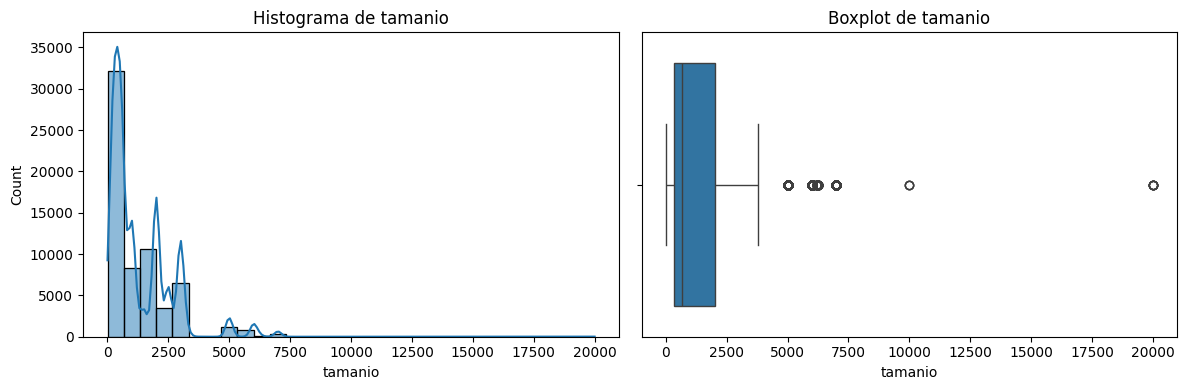

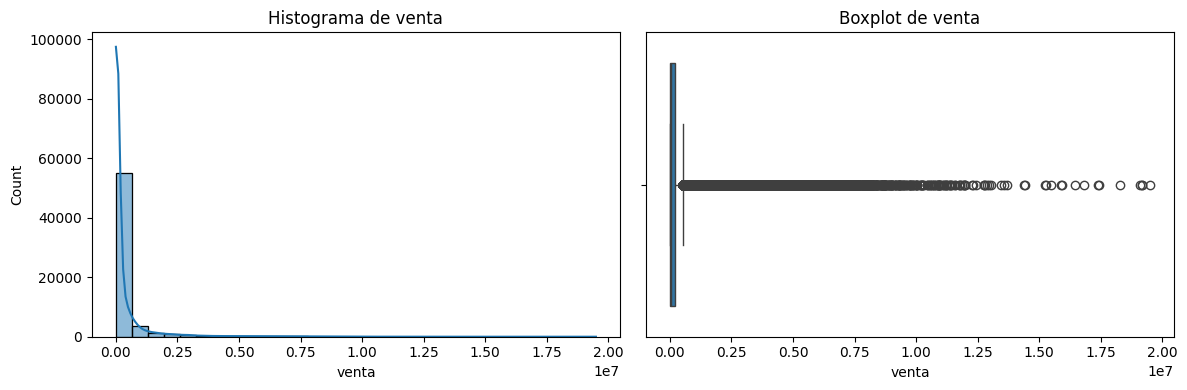

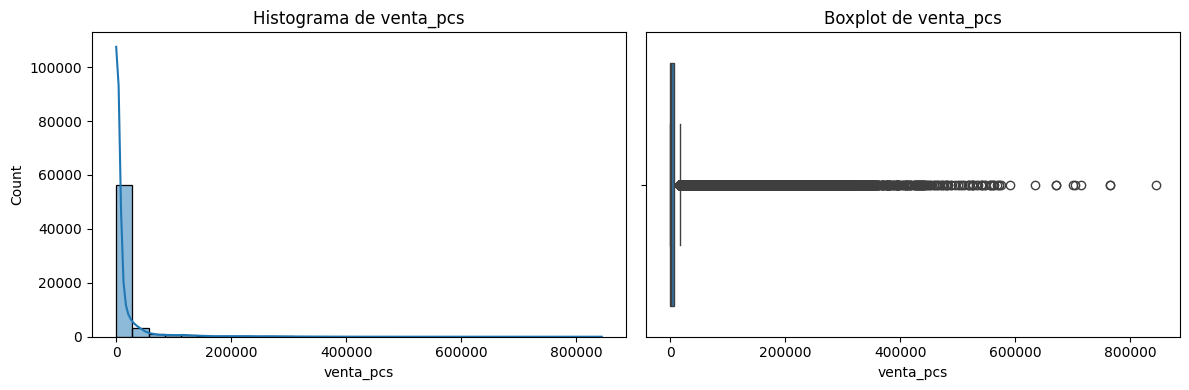

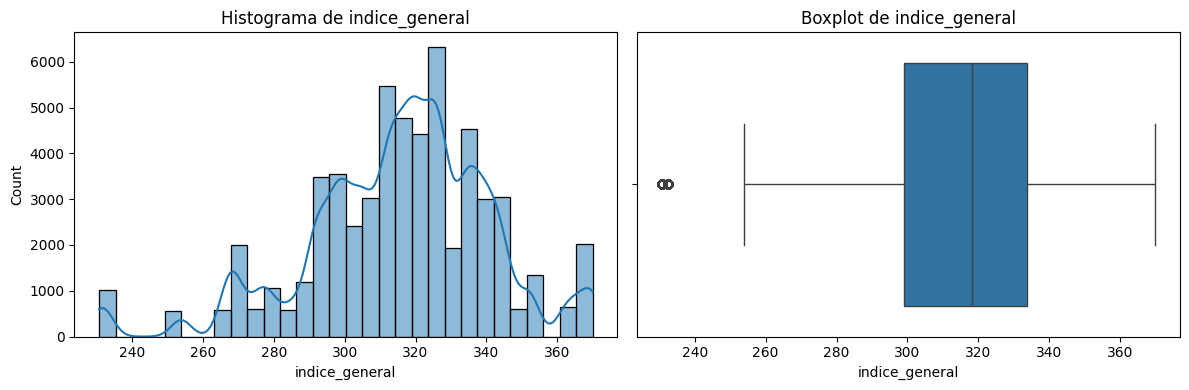

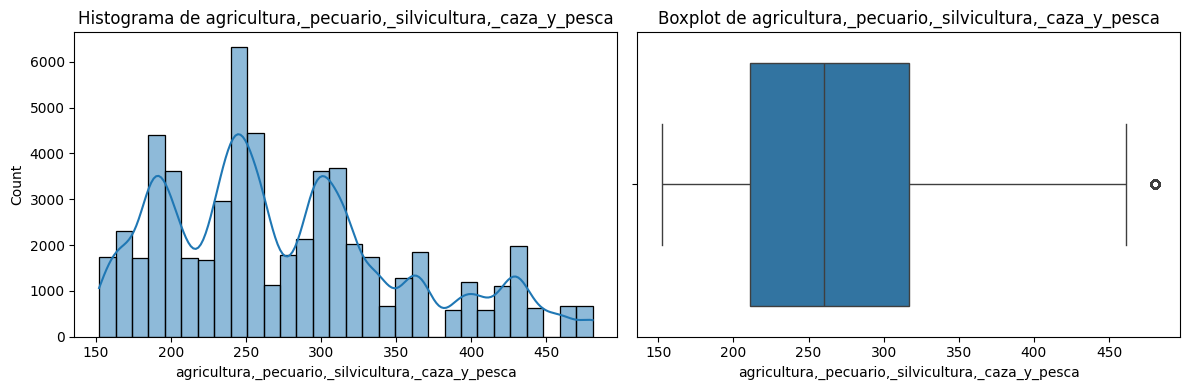

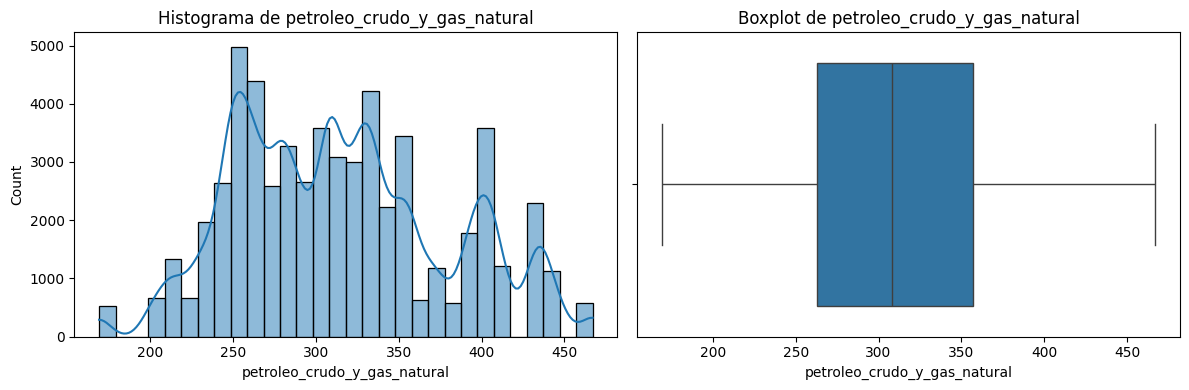

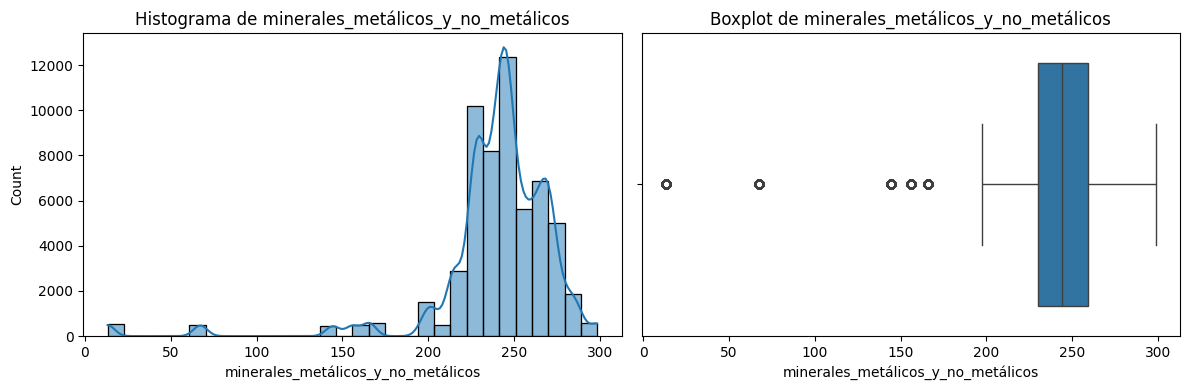

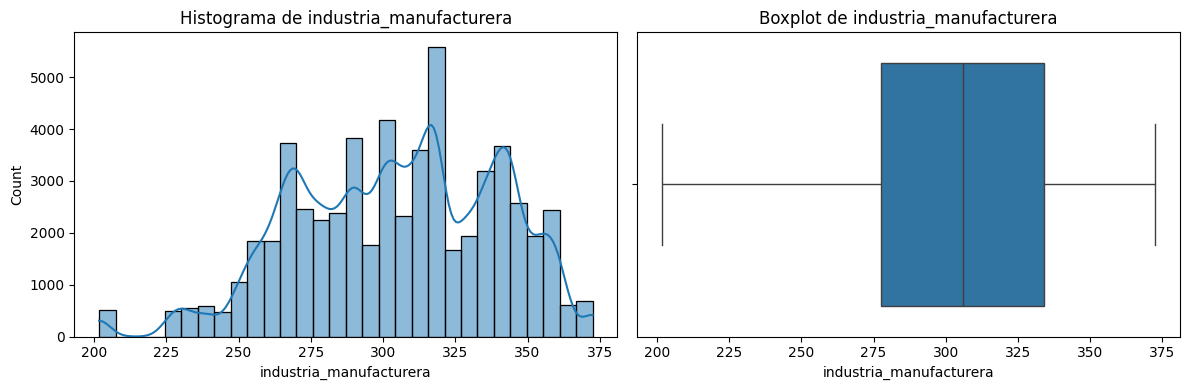

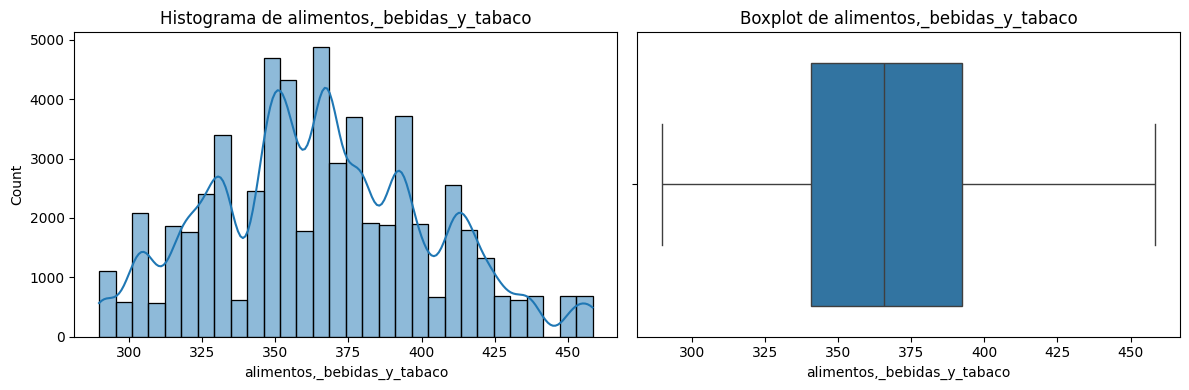

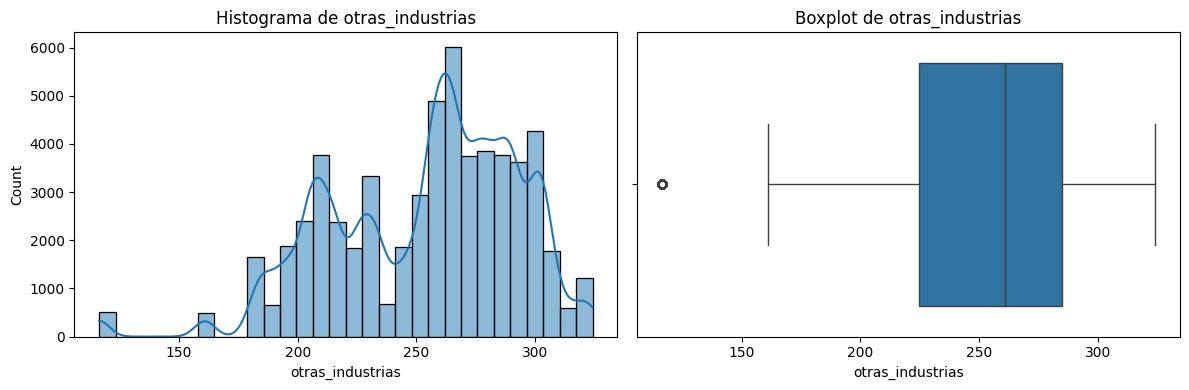

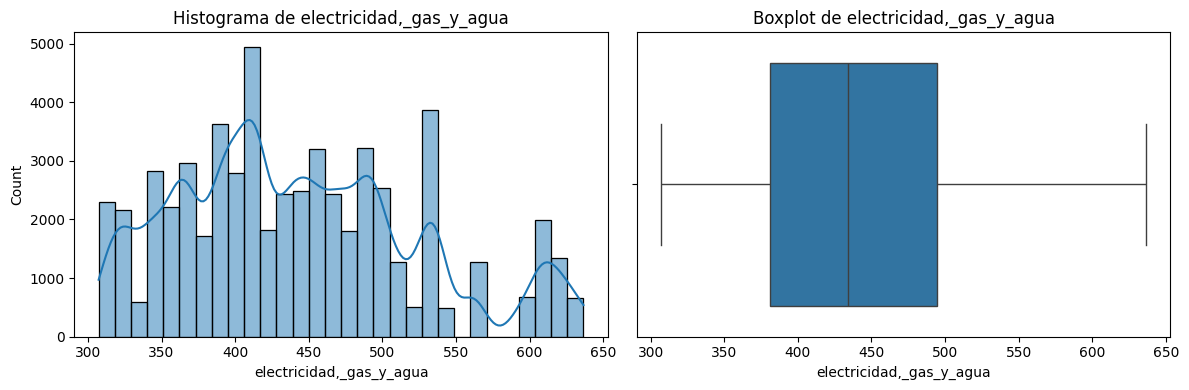

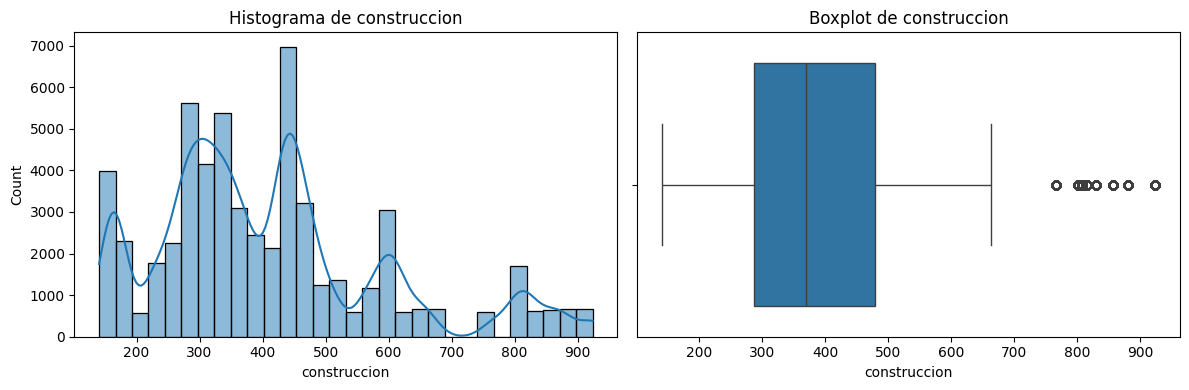

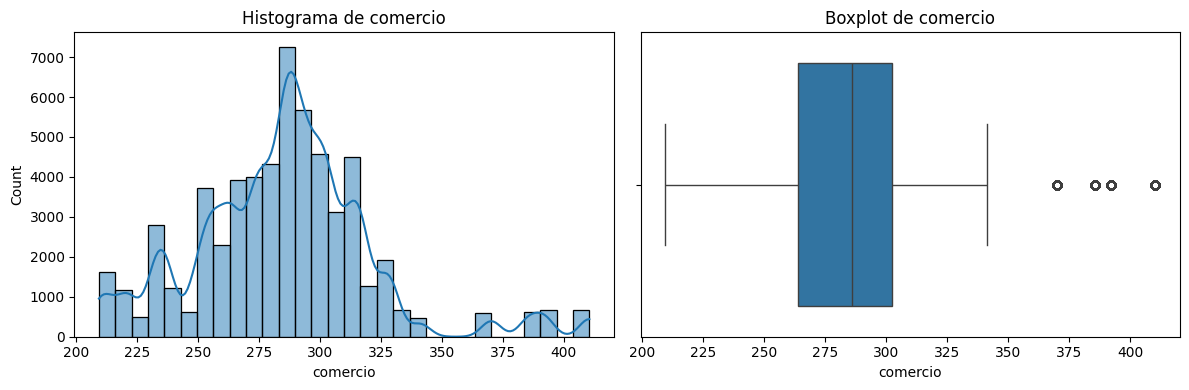

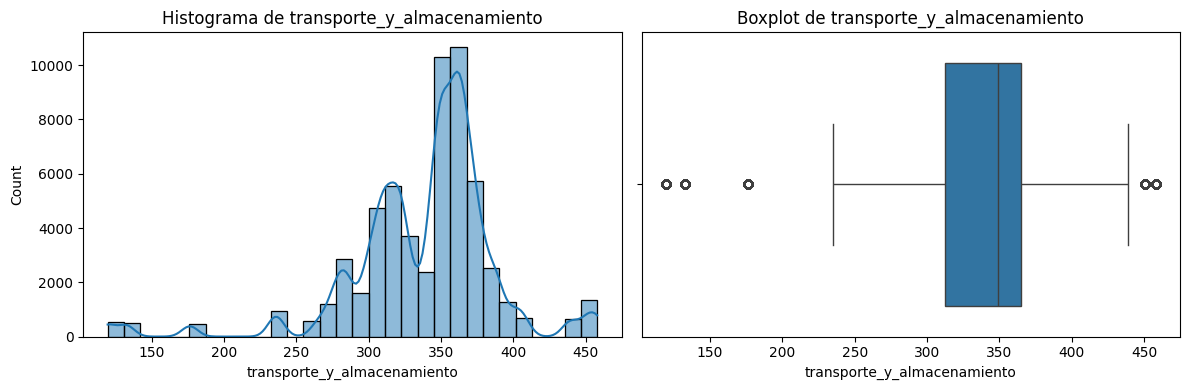

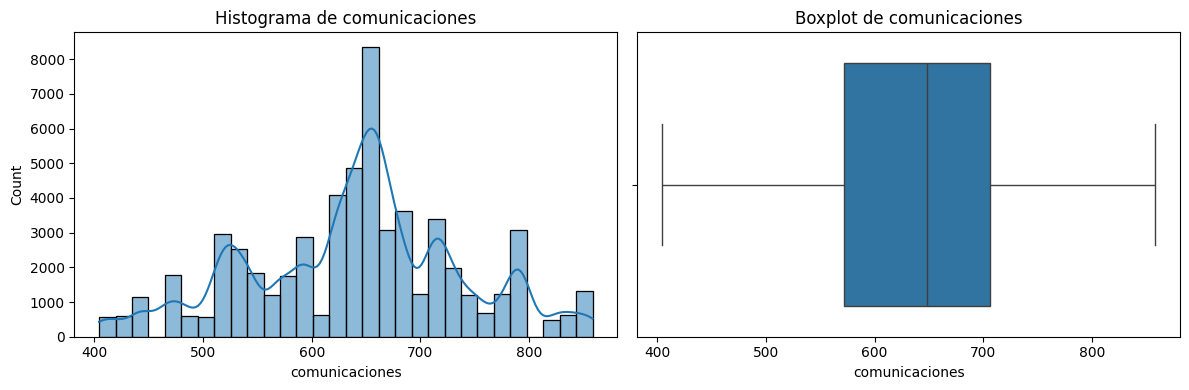

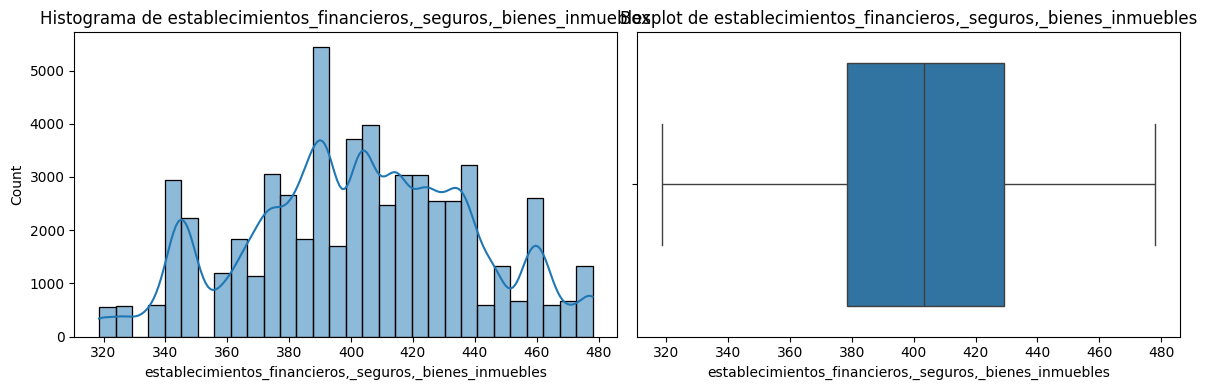

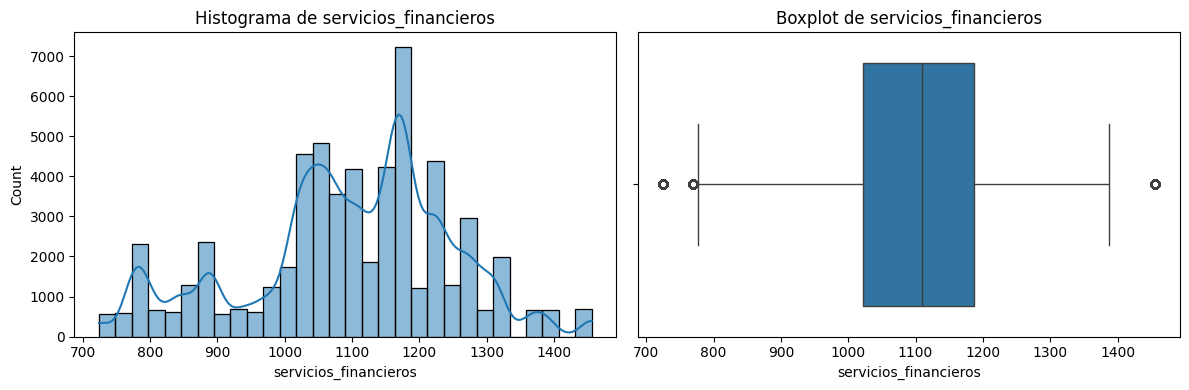

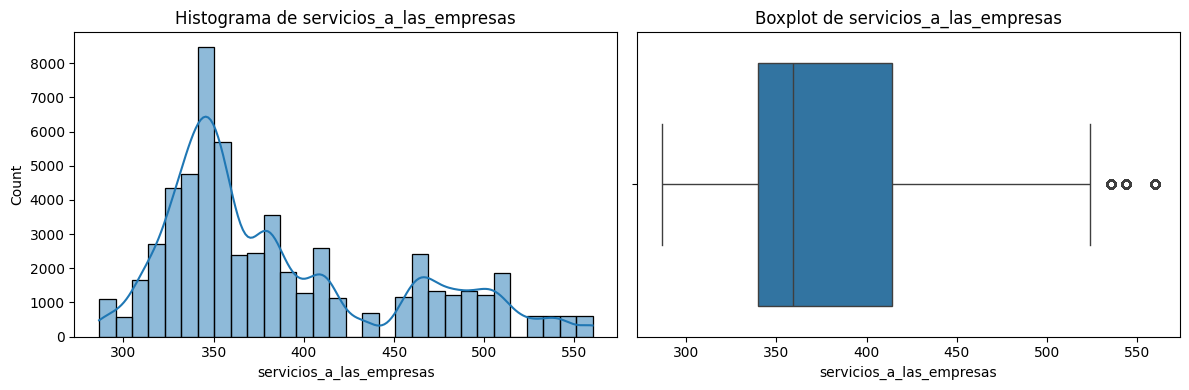

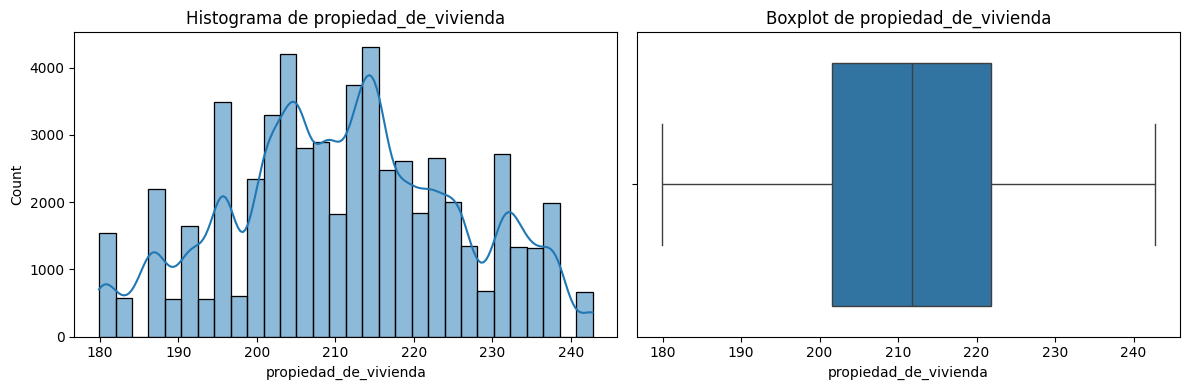

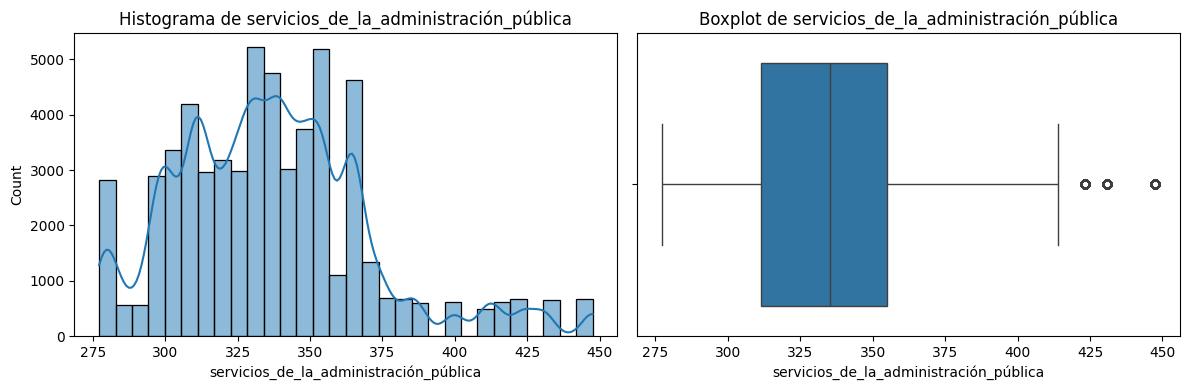

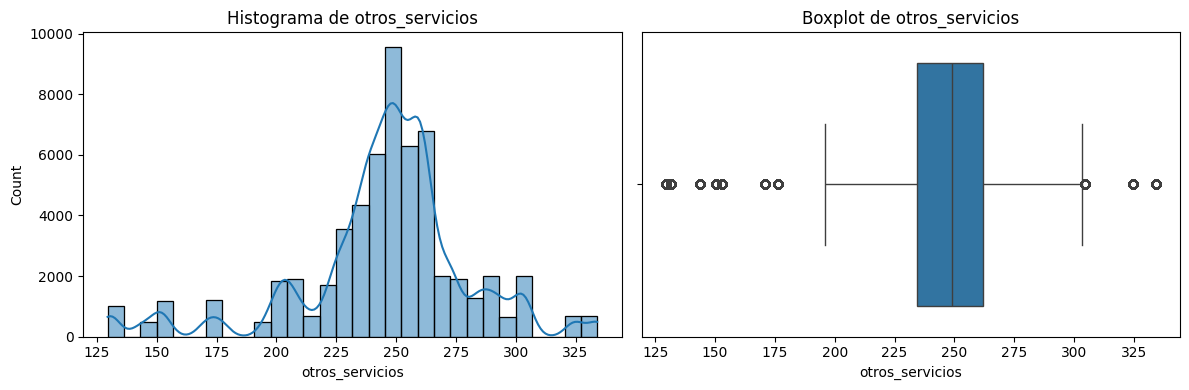

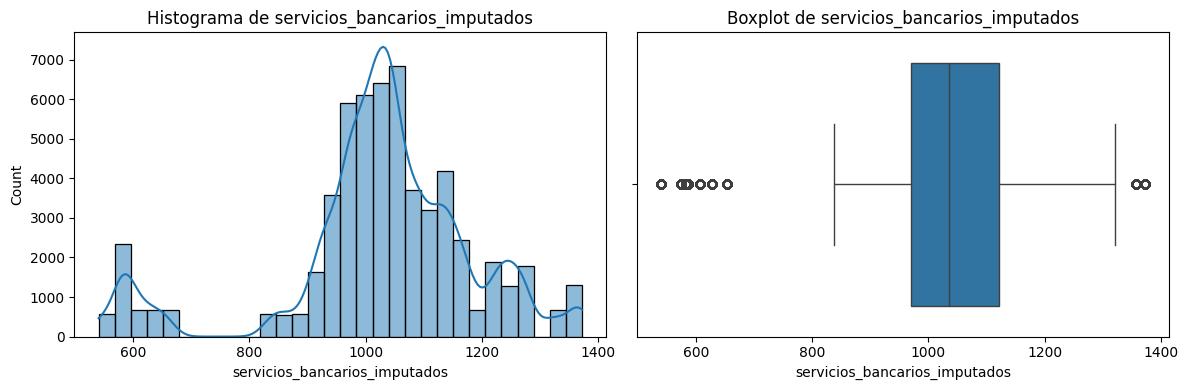

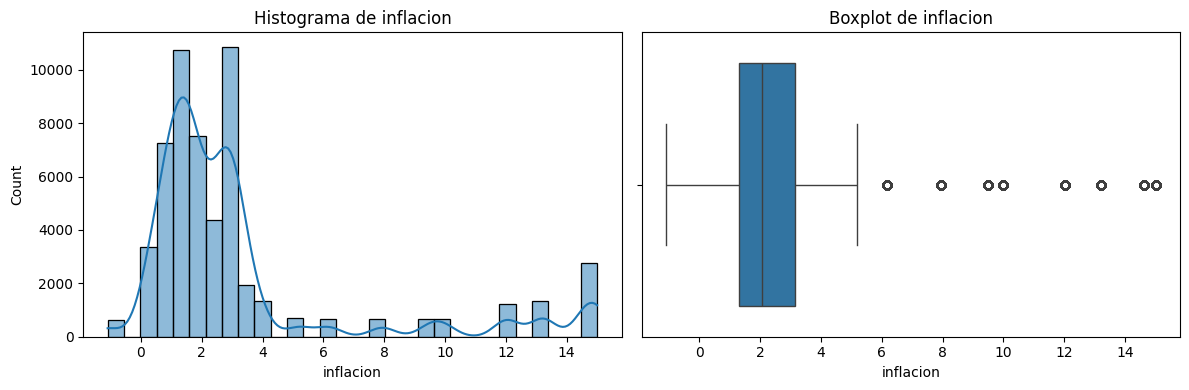

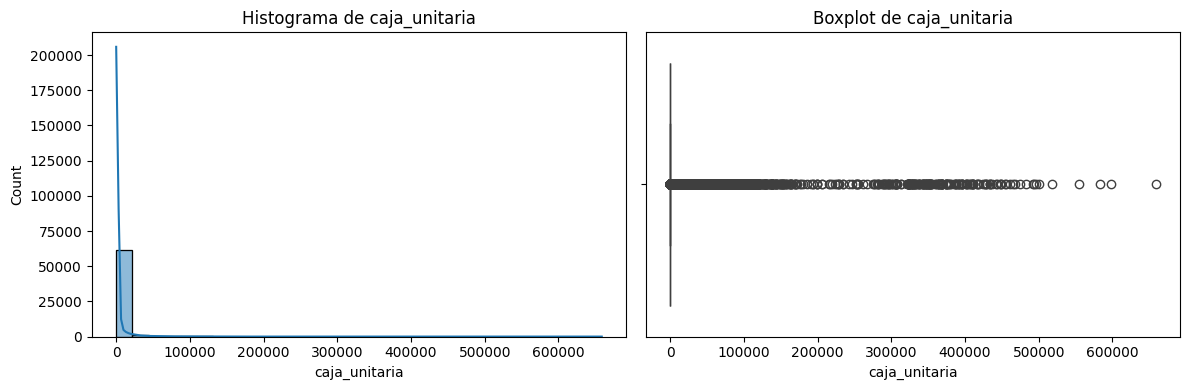

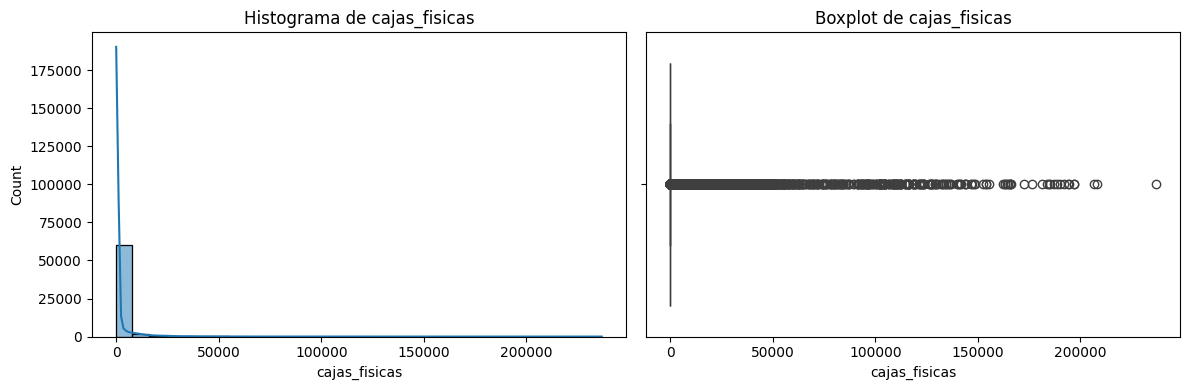

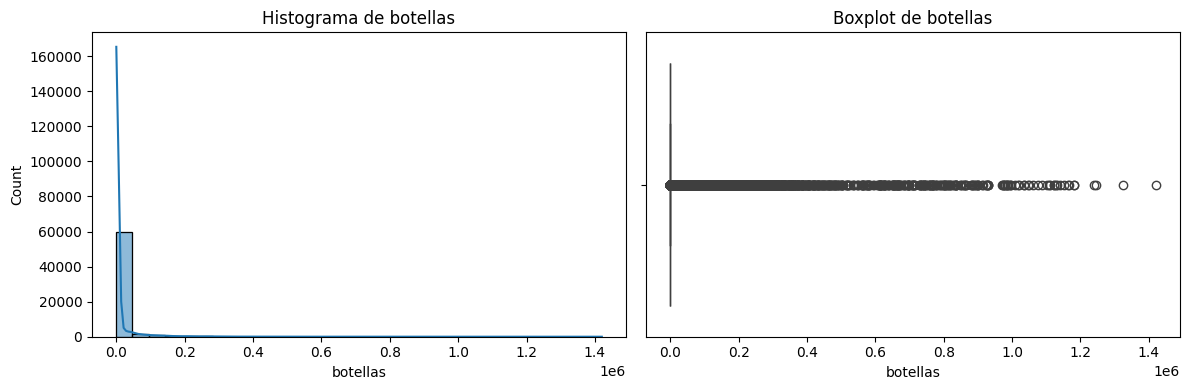

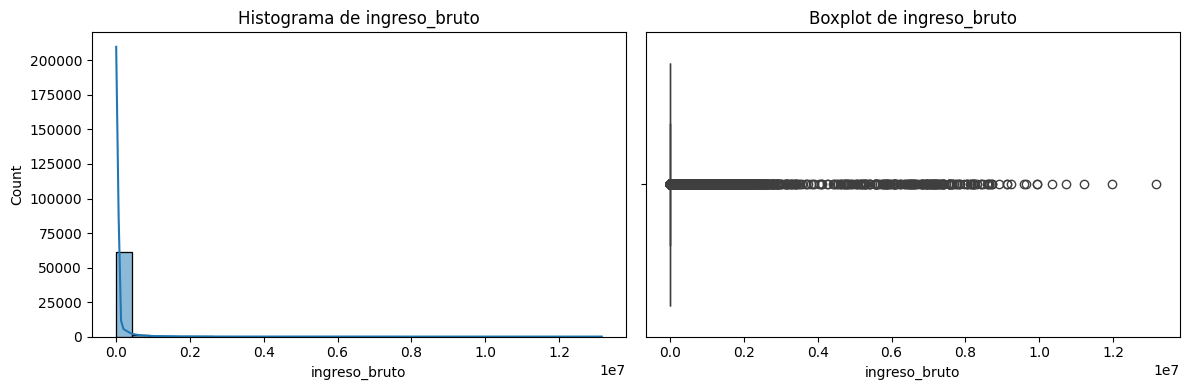

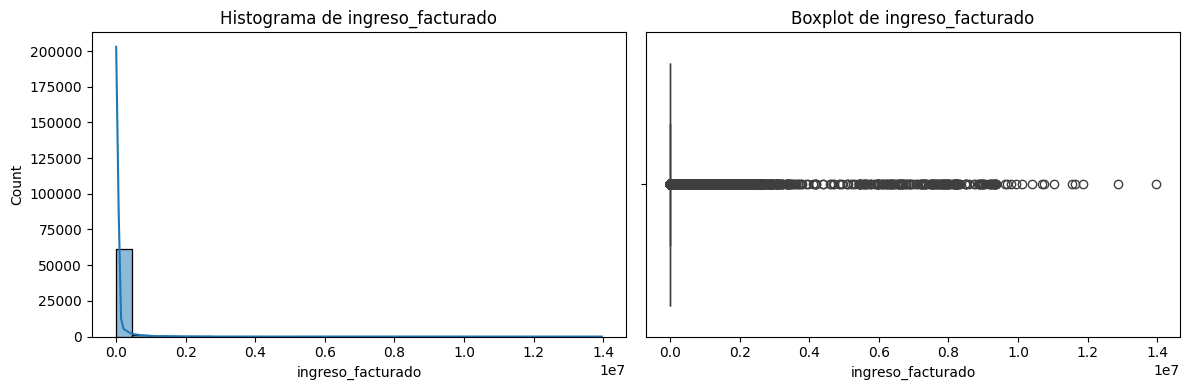

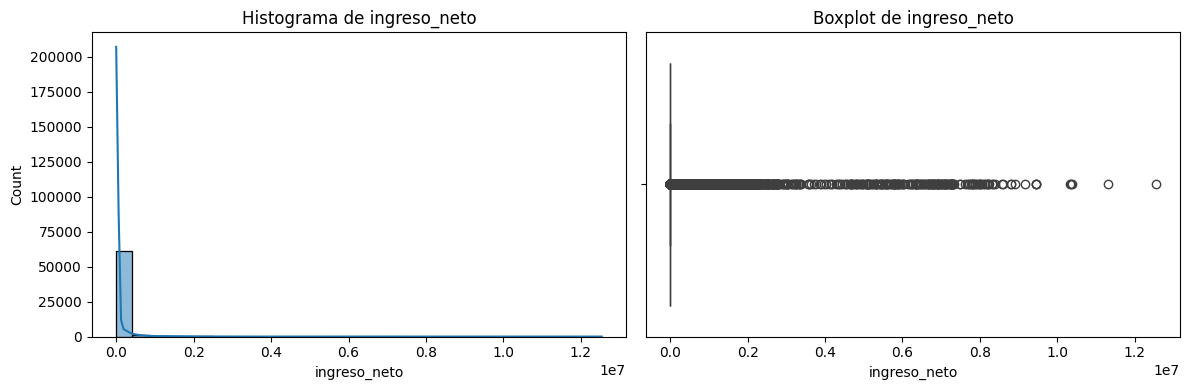

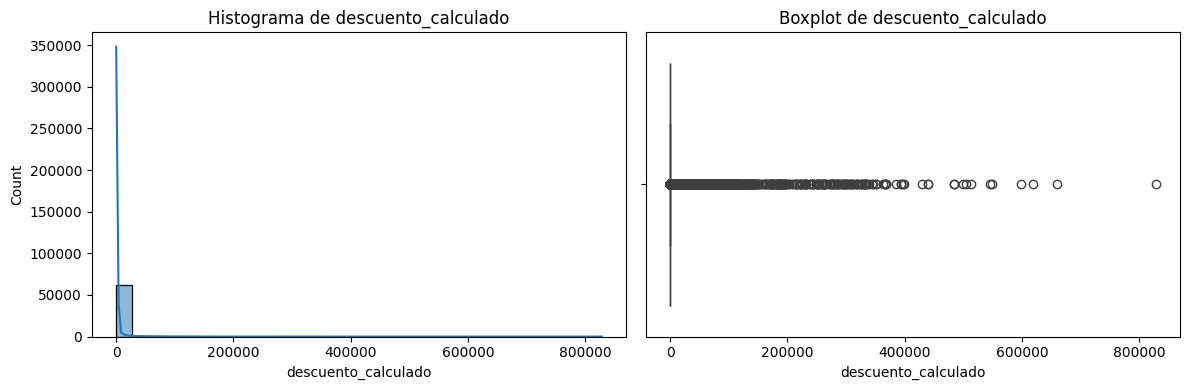

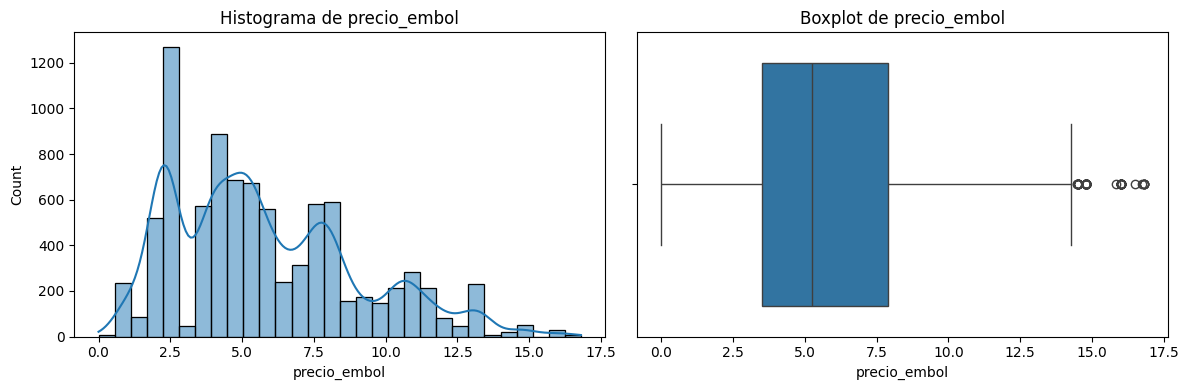

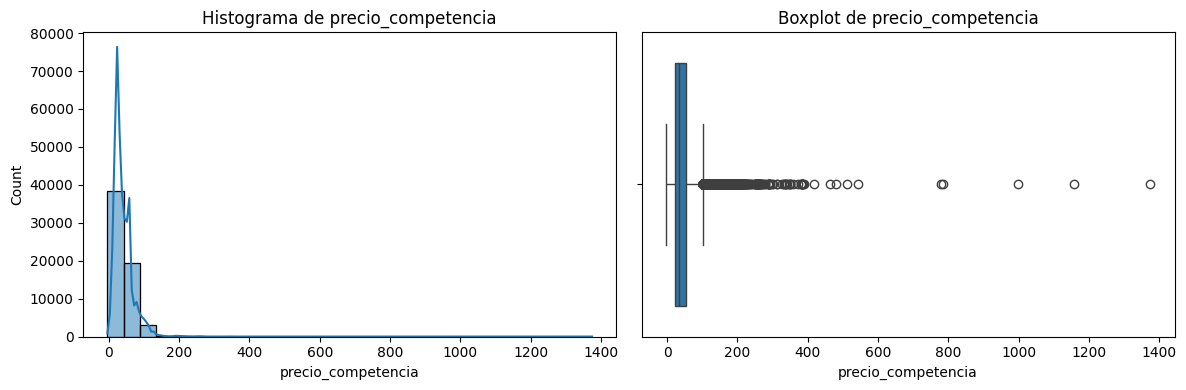

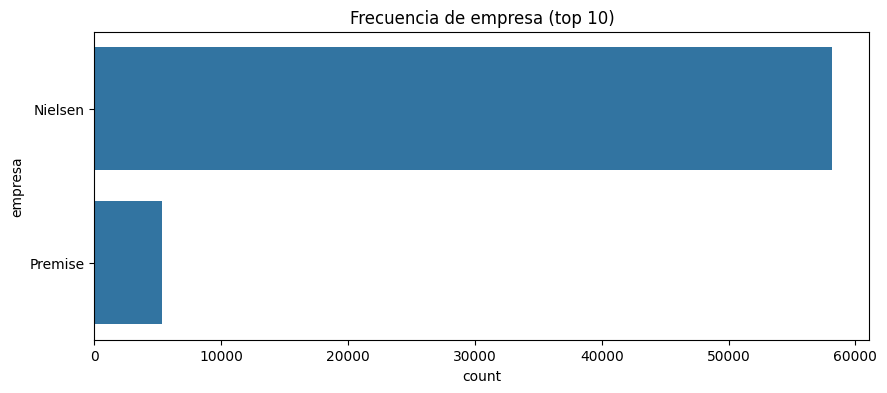

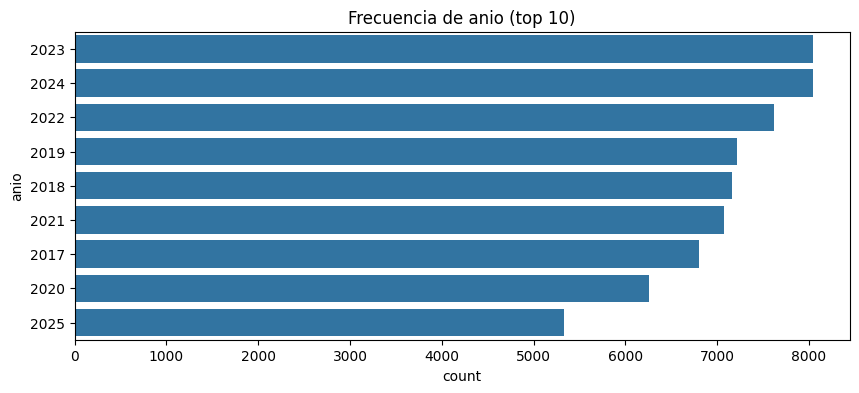

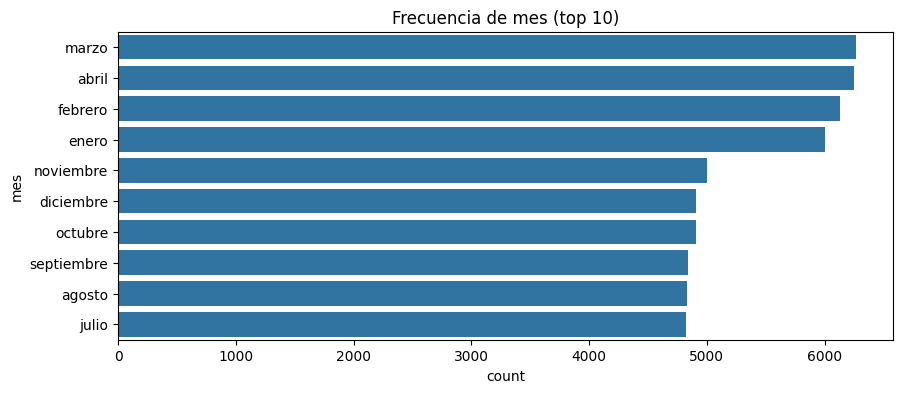

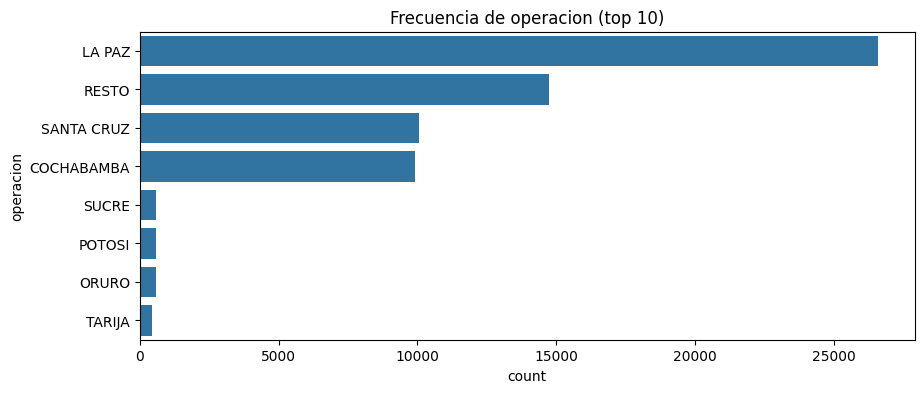

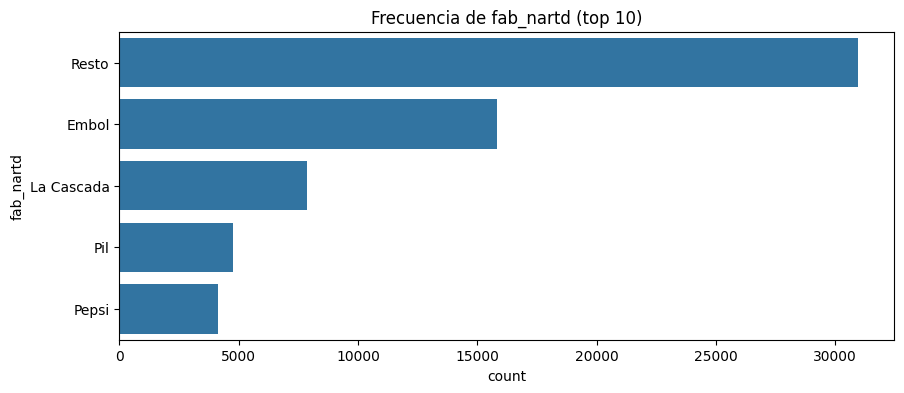

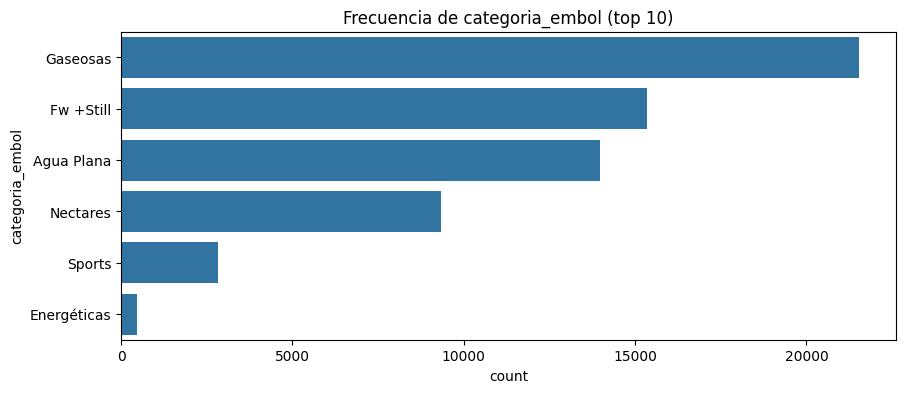

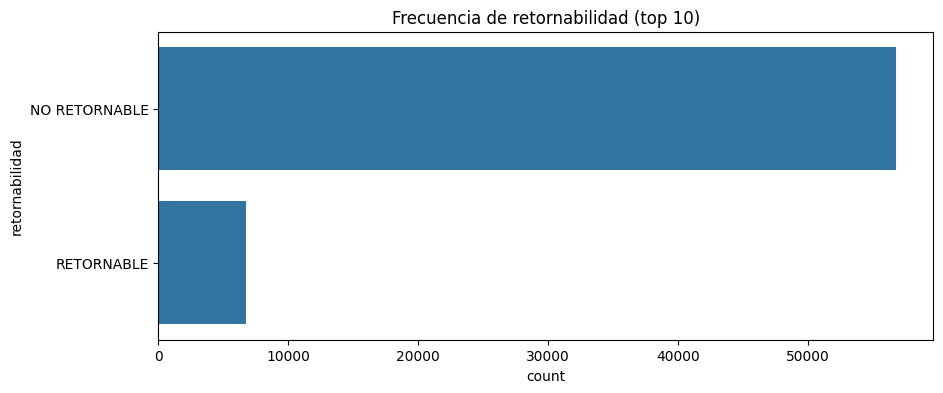

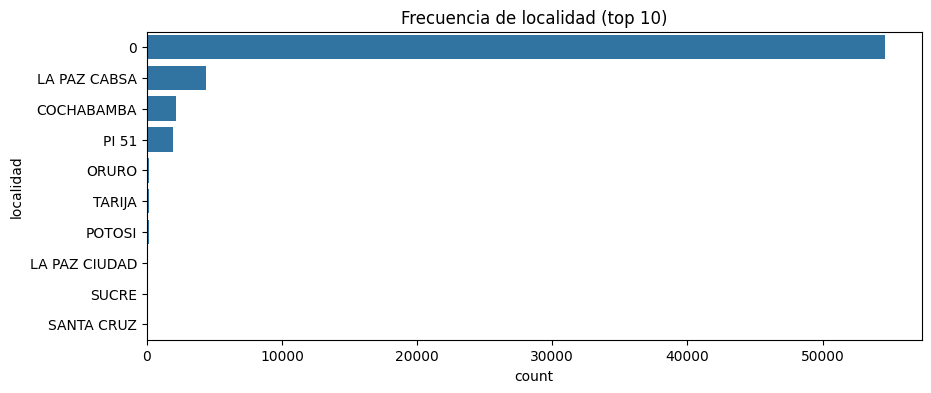

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Histograma de {col}')

    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')

    plt.tight_layout()
    plt.show()

for col in object_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().iloc[:10].index)
    plt.title(f'Frecuencia de {col} (top 10)')
    plt.show()


In [ ]:
def detect_outliers_zscore(df, threshold=3):
    numeric_df = df.select_dtypes(include=np.number)
    z_scores = np.abs(stats.zscore(numeric_df, nan_policy='omit'))
    return (z_scores > threshold).sum(axis=0)

In [ ]:
detect_outliers_zscore(df)

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


array([1263, 1375, 1397, 1019,    0,    0, 1019,    0,    0,  519,    0,
          0,  670, 1491,    0,    0,    0,    0,    0,  664, 1019,    0,
       1415,  603,  766,  904,  620,  603,  621,  560,   36,    0])

In [ ]:
# Asimetría de las variables numéricas
numeric_df = df.select_dtypes(include=np.number)
skewness = numeric_df.skew().sort_values(ascending=False)
skewness

descuento_calculado                                        17.723773
caja_unitaria                                              14.128645
ingreso_facturado                                          13.864928
ingreso_bruto                                              13.761840
ingreso_neto                                               13.726120
cajas_fisicas                                              11.632058
botellas                                                   10.481724
venta_pcs                                                   6.332519
venta                                                       6.124206
inflacion                                                   2.041214
tamanio                                                     1.989390
construccion                                                0.924639
servicios_a_las_empresas                                    0.922668
servicios_de_la_administración_pública                      0.782208
precio_embol                                                0.723154
comercio                                                    0.631397
agricultura,_pecuario,_silvicultura,_caza_y_pesca           0.620068
electricidad,_gas_y_agua                                    0.494493
petroleo_crudo_y_gas_natural                                0.325418
alimentos,_bebidas_y_tabaco                                 0.214548
propiedad_de_vivienda                                       0.000304
establecimientos_financieros,_seguros,_bienes_inmuebles    -0.055584
comunicaciones                                             -0.126483
industria_manufacturera                                    -0.283174
servicios_financieros                                      -0.398671
indice_general                                             -0.592446
otras_industrias                                           -0.616602
otros_servicios                                            -0.840463
servicios_bancarios_imputados                              -0.954700
transporte_y_almacenamiento                                -1.368761
minerales_metálicos_y_no_metálicos                         -3.297437
precio_competencia                                               NaN
dtype: float64

In [ ]:
def plot_time_trends(df, time_col, value_col):
    if time_col not in df.columns or value_col not in df.columns:
        print("Columnas no encontradas en el DataFrame.")
        return
    df[time_col] = pd.to_datetime(df[time_col], errors="coerce")
    trend = df.groupby(time_col)[value_col].mean()
    trend.plot(figsize=(12, 6), title=f"Tendencia temporal de {value_col}")
    plt.show()

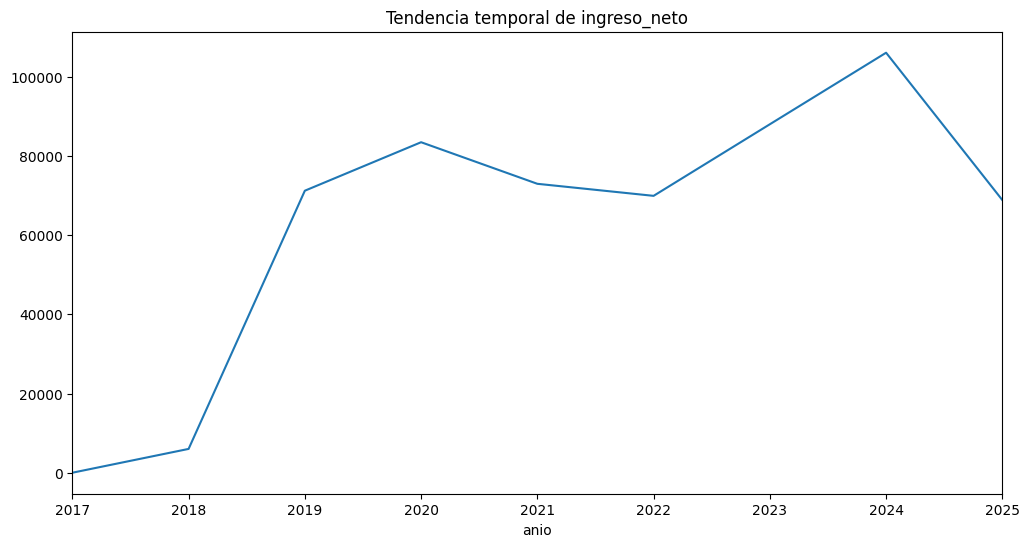

In [ ]:
plot_time_trends(df, 'anio', 'ingreso_neto')

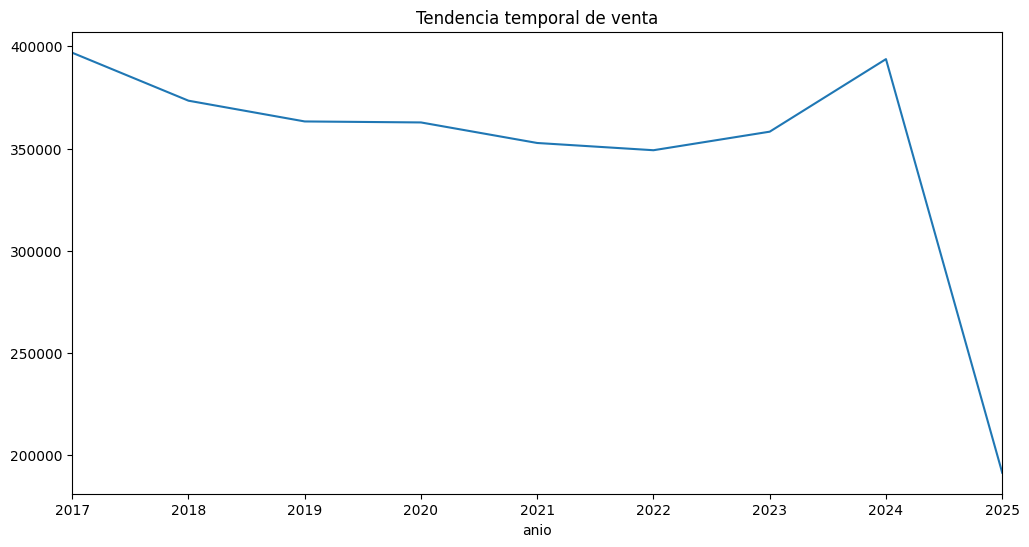

In [ ]:
plot_time_trends(df, 'anio', 'venta')

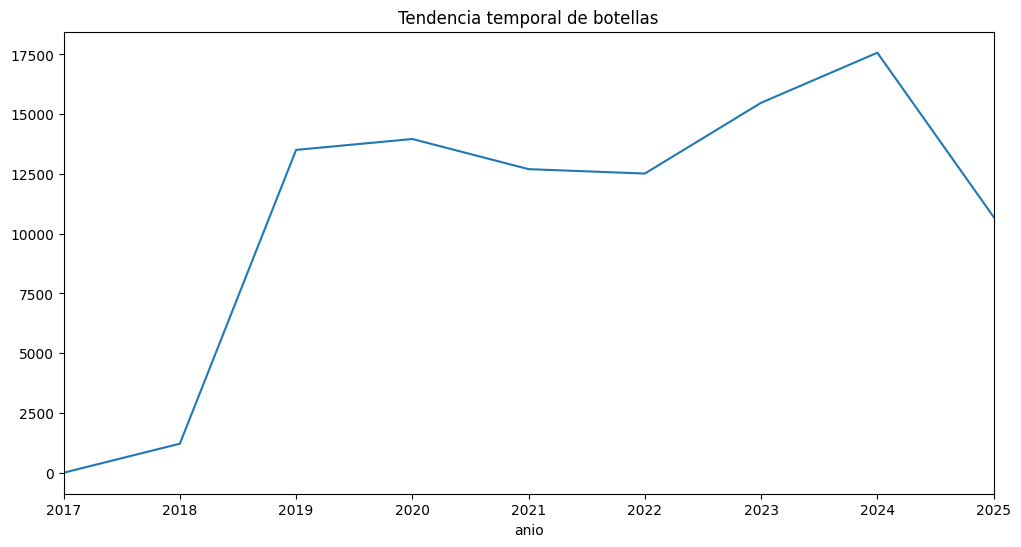

In [ ]:
plot_time_trends(df, 'anio', 'botellas')

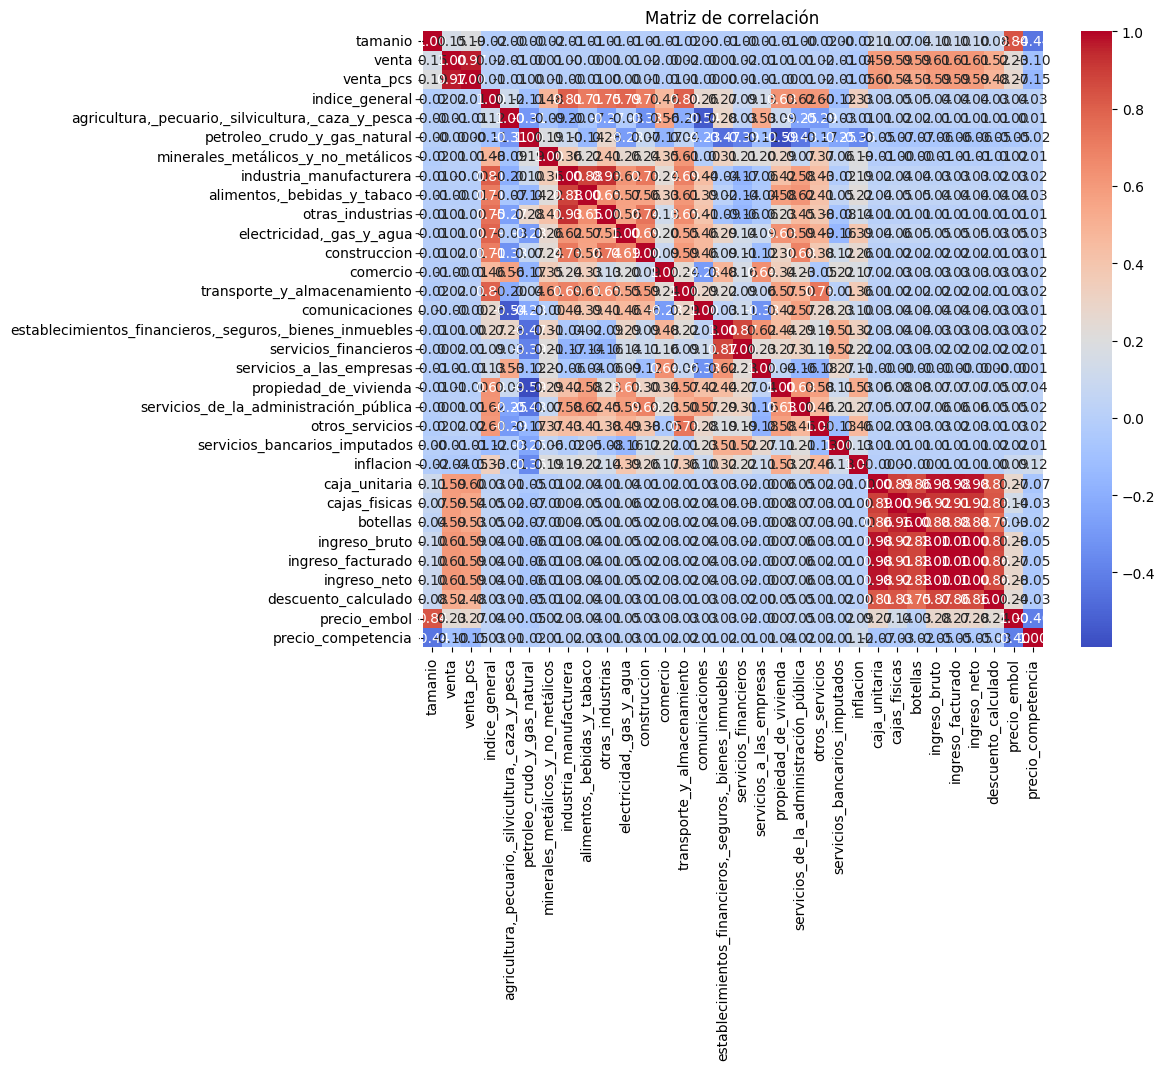

In [ ]:
# Matriz de correlación
corr = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de correlación")
plt.show()

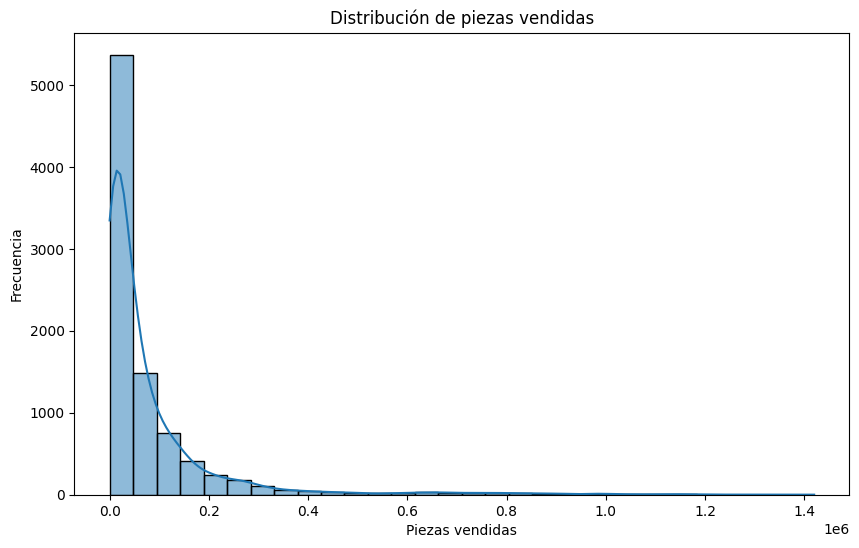

In [ ]:
# Análisis de variable objetivo de Embol
target_col = 'botellas'
df_embol_filtered = df[df[target_col] > 0] # Filtrando sólo lo que vende Embol
plt.figure(figsize=(10,6))
sns.histplot(df_embol_filtered[target_col], bins=30, kde=True)
plt.title("Distribución de piezas vendidas")
plt.xlabel("Piezas vendidas")
plt.ylabel("Frecuencia")
plt.show()

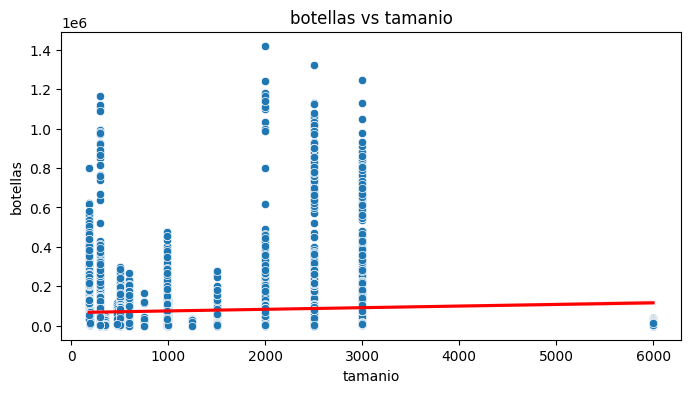

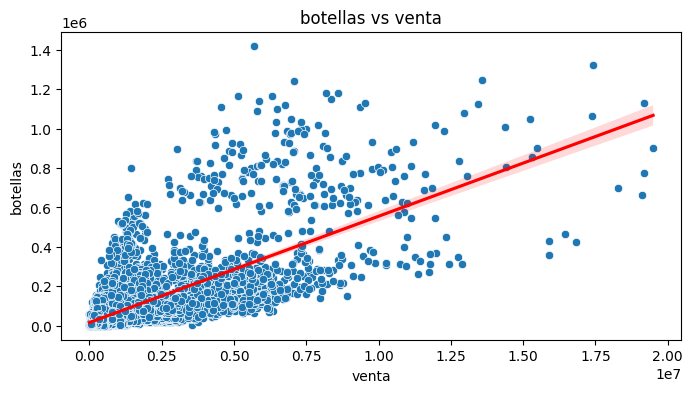

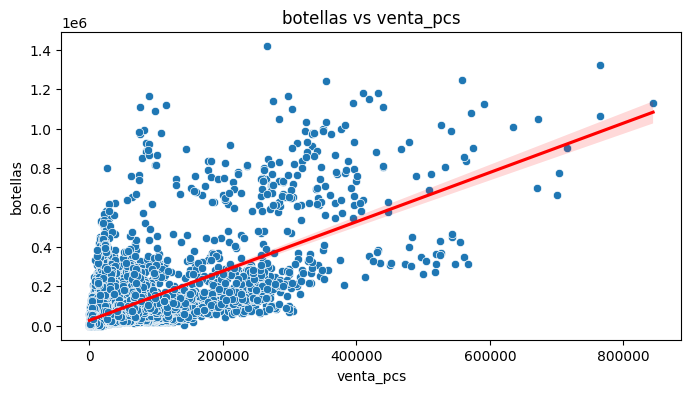

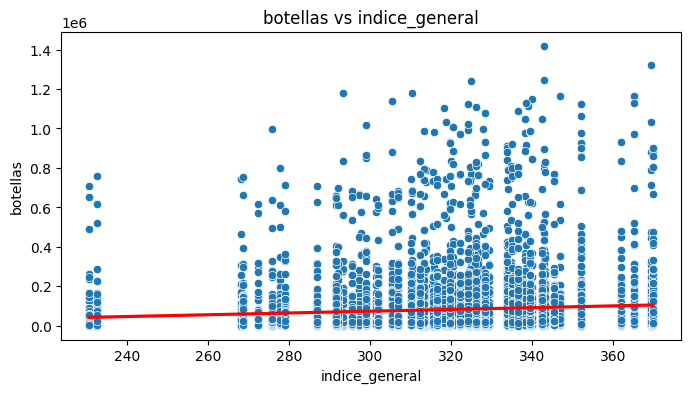

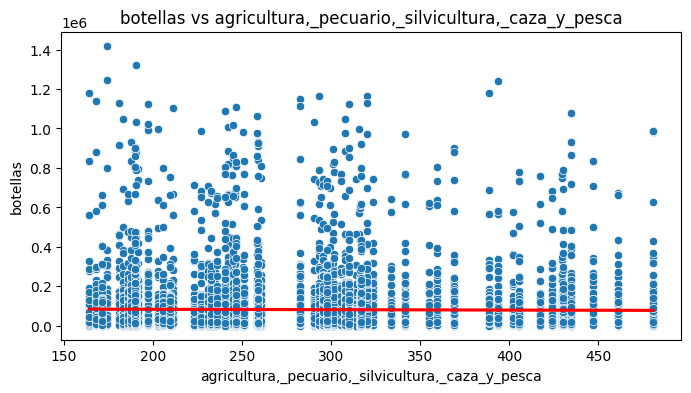

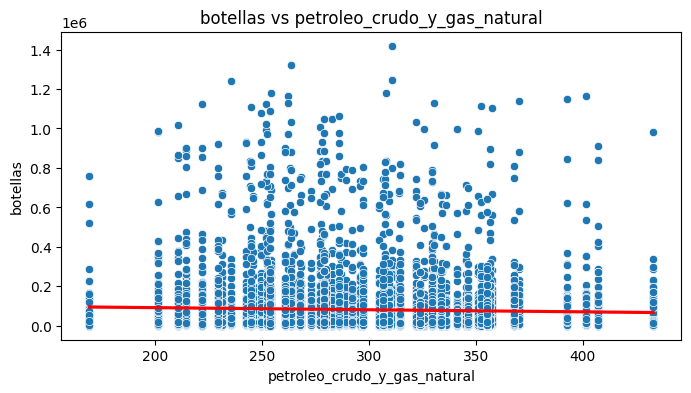

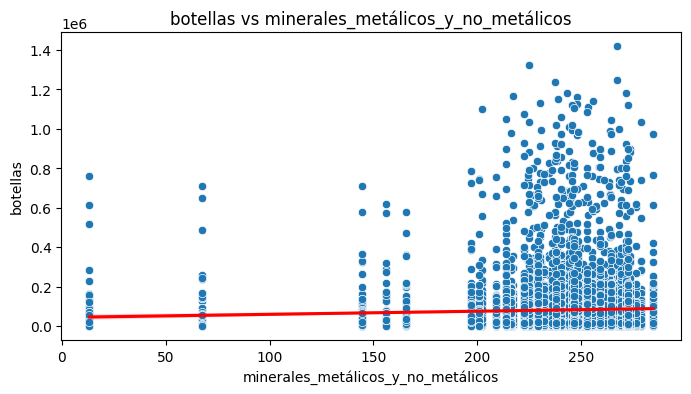

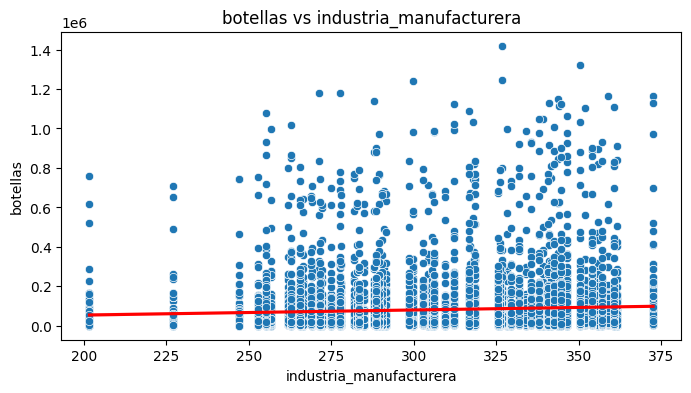

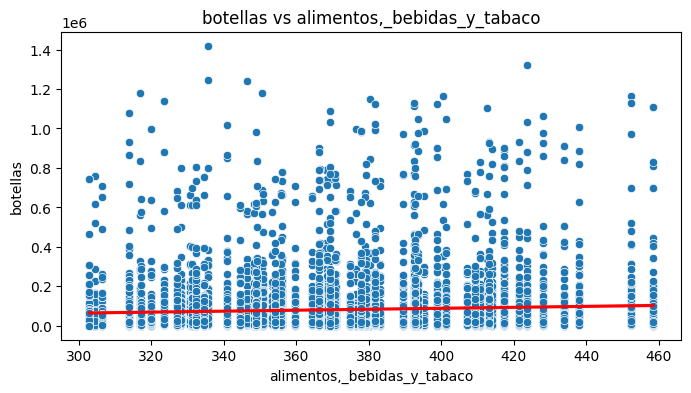

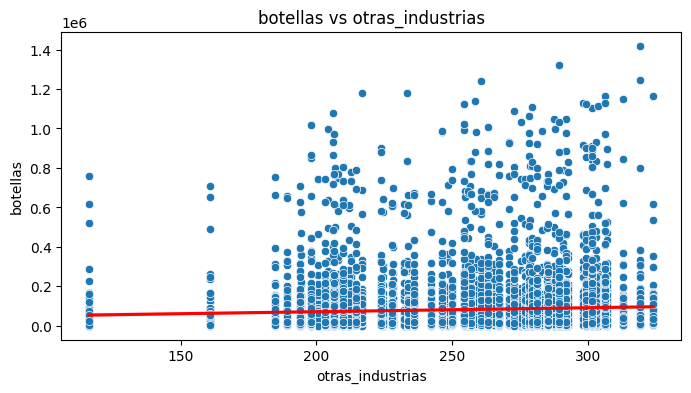

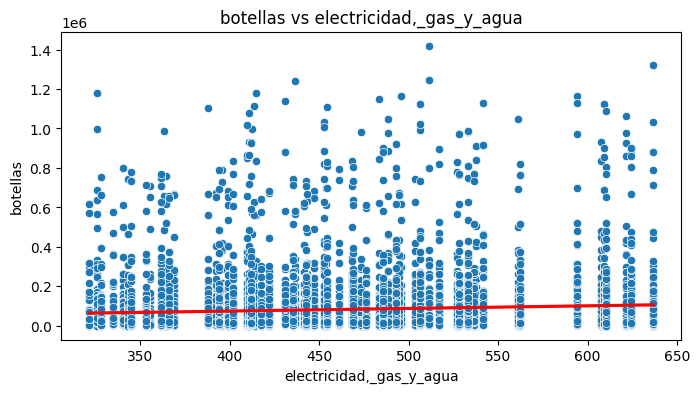

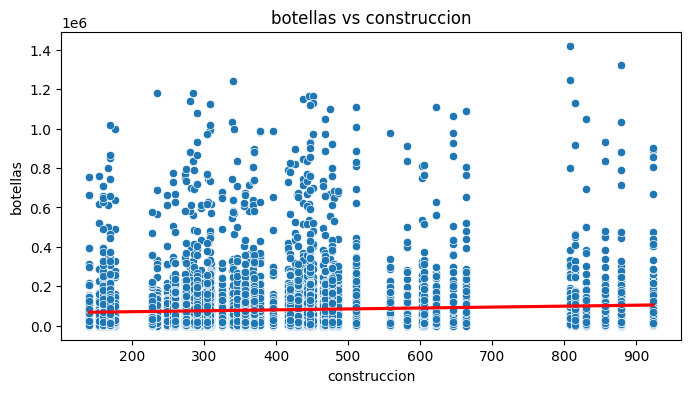

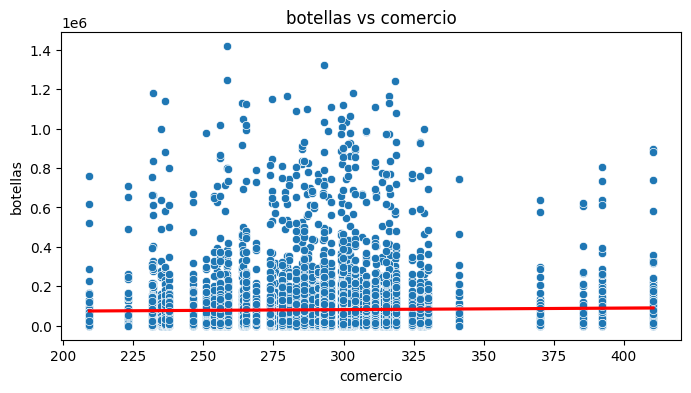

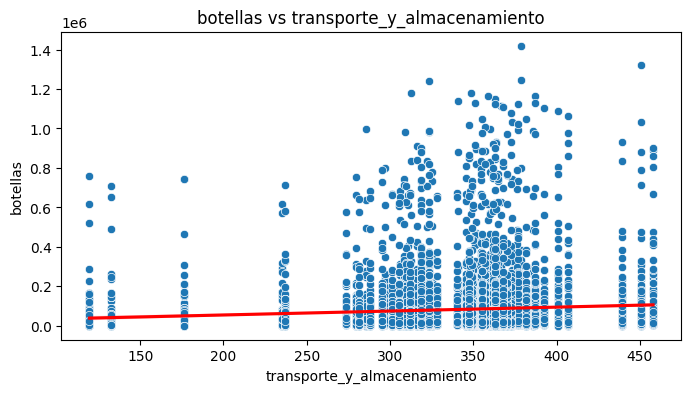

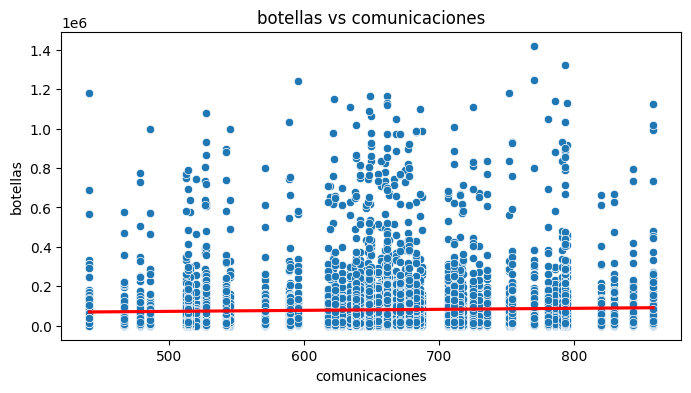

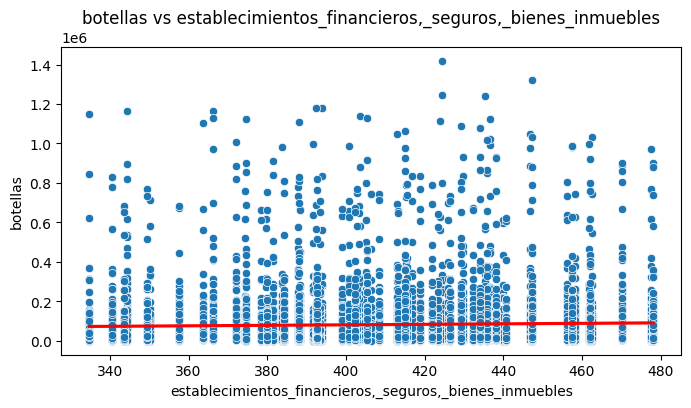

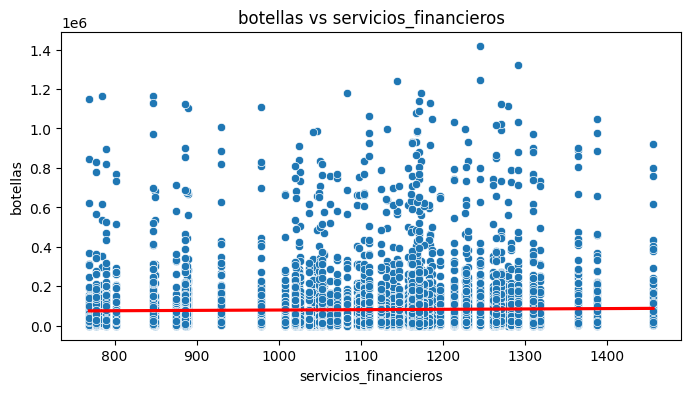

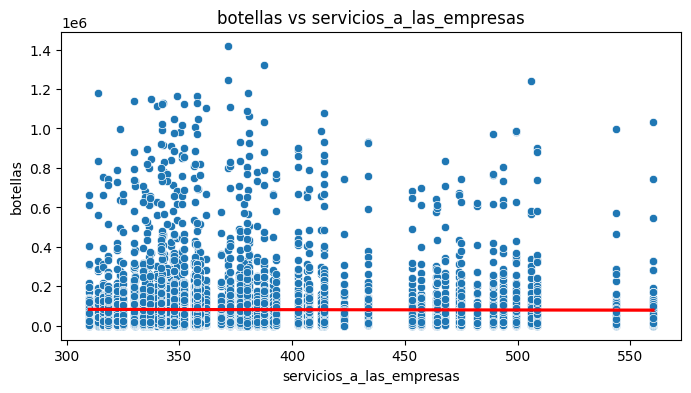

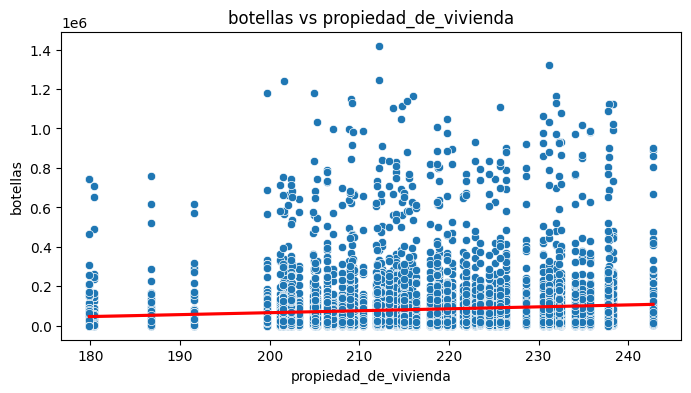

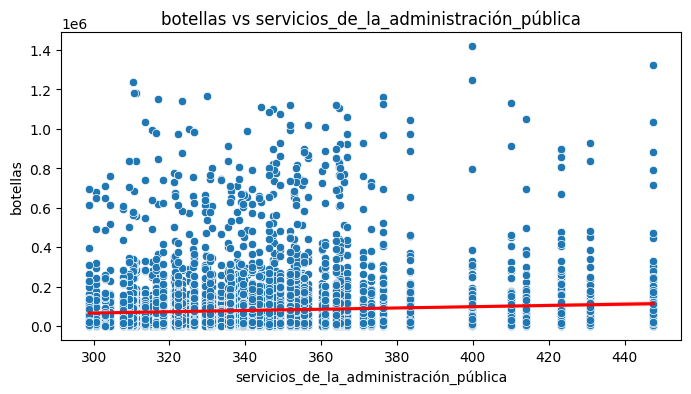

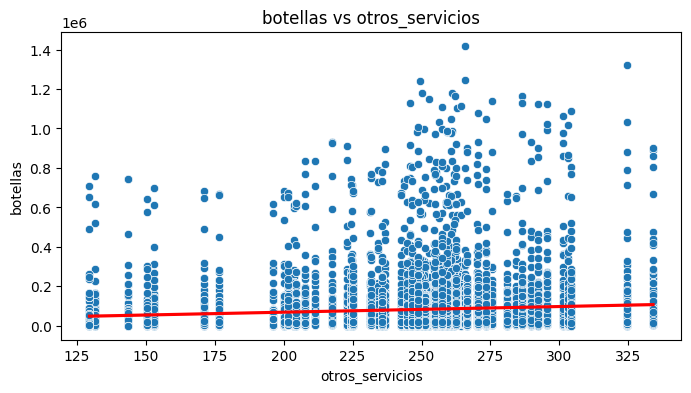

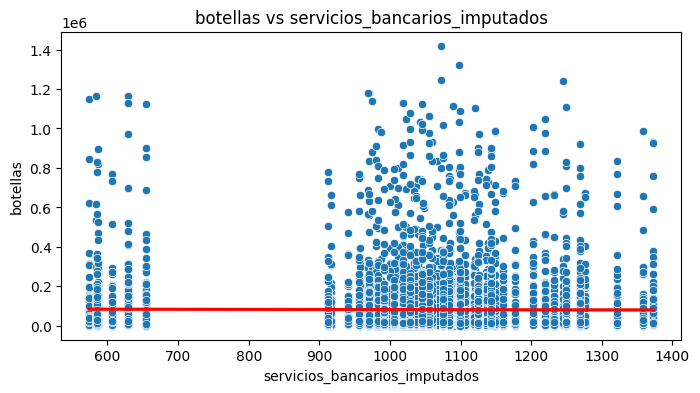

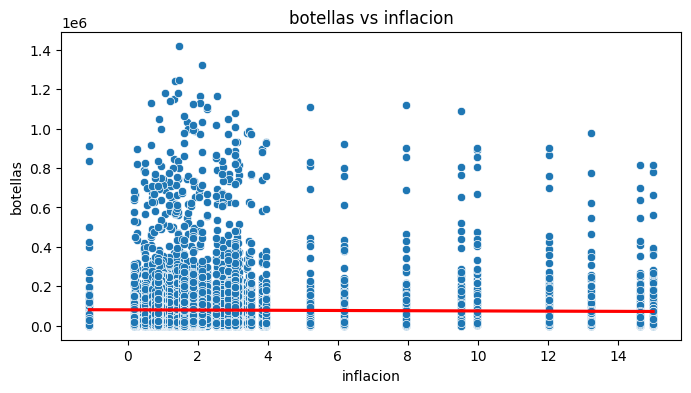

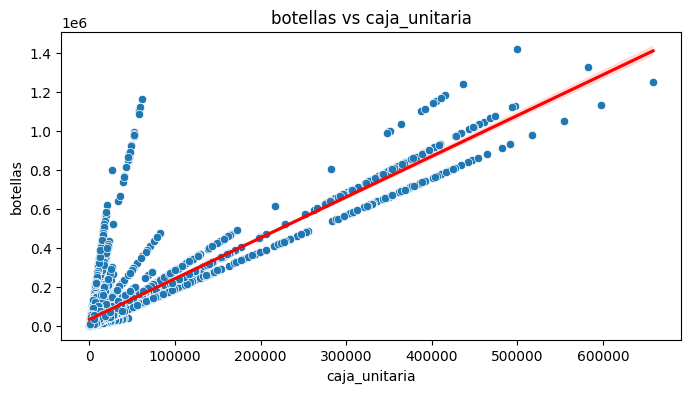

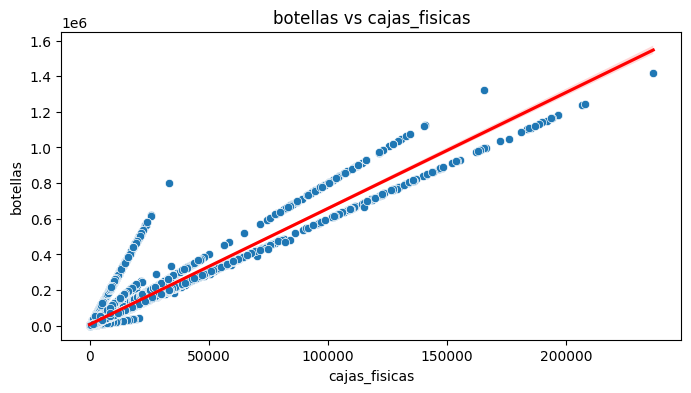

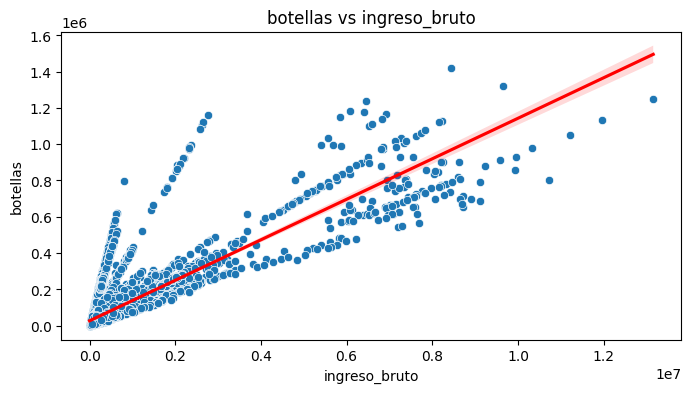

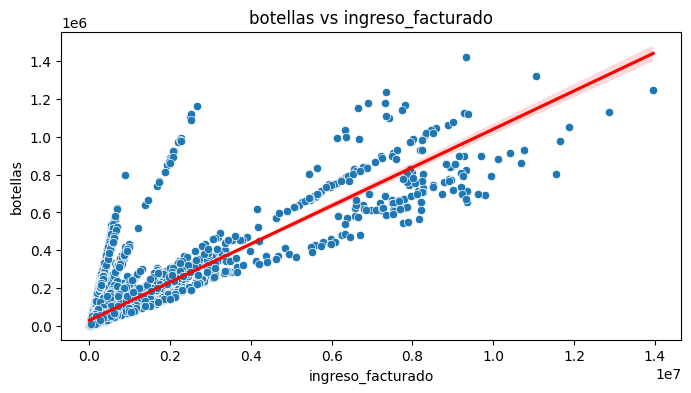

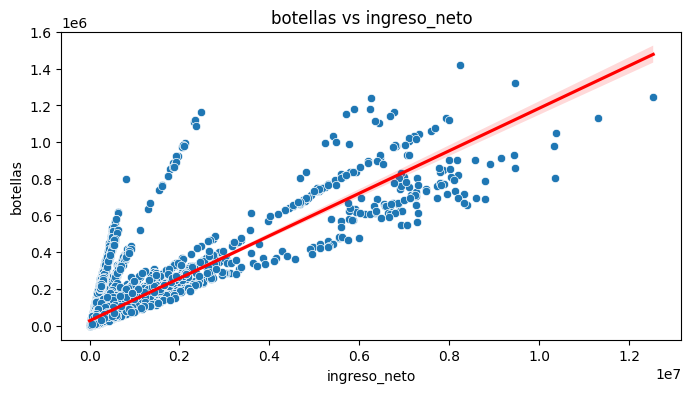

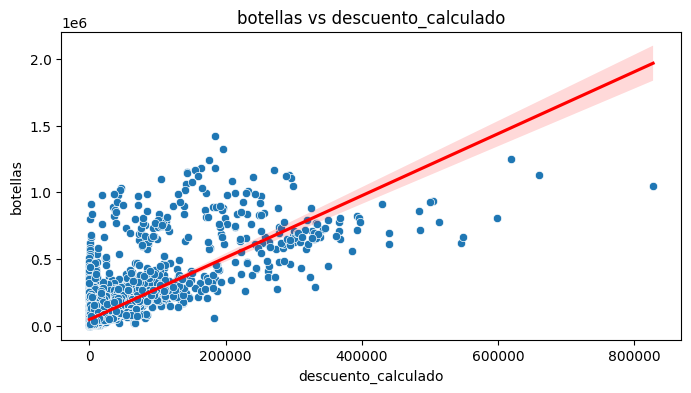

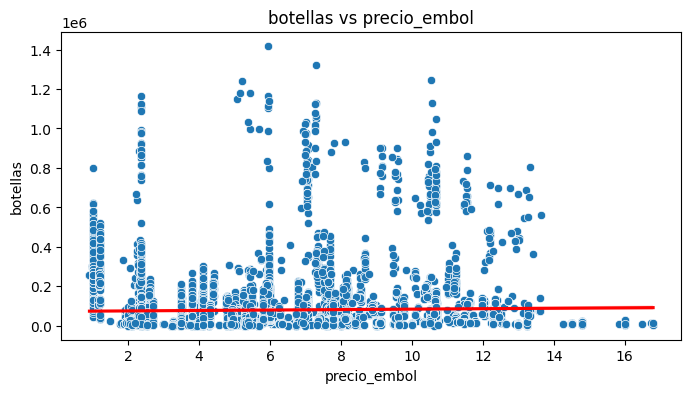

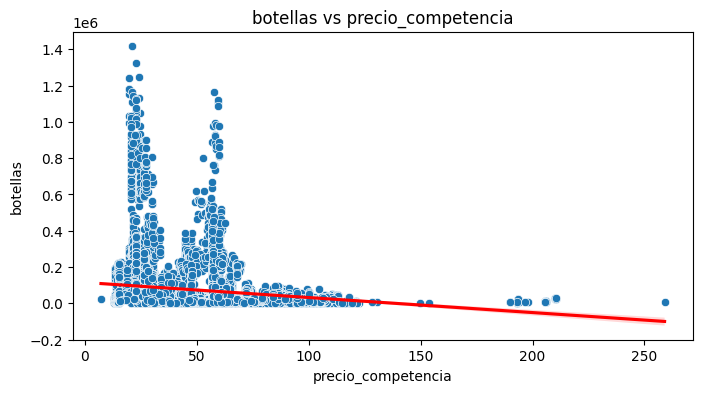

In [ ]:
# Análisis bivariado para variable objetivo en Embol
for col in numeric_cols:
    if col != target_col:
        plt.figure(figsize=(8,4))
        sns.scatterplot(x=col, y=target_col, data=df_embol_filtered)
        sns.regplot(x=col, y=target_col, data=df_embol_filtered, scatter=False, color="red")  # línea de tendencia
        plt.title(f"{target_col} vs {col}")
        plt.show()

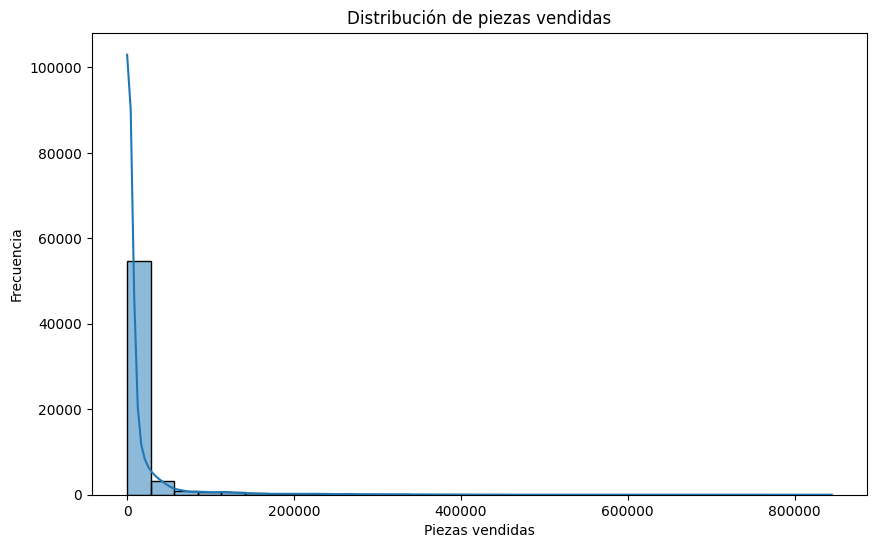

In [ ]:
# Análisis de variable objetivo de competencia
target_col = 'venta_pcs'
plt.figure(figsize=(10,6))
sns.histplot(df[df[target_col] > 0][target_col], bins=30, kde=True)
plt.title("Distribución de piezas vendidas")
plt.xlabel("Piezas vendidas")
plt.ylabel("Frecuencia")
plt.show()

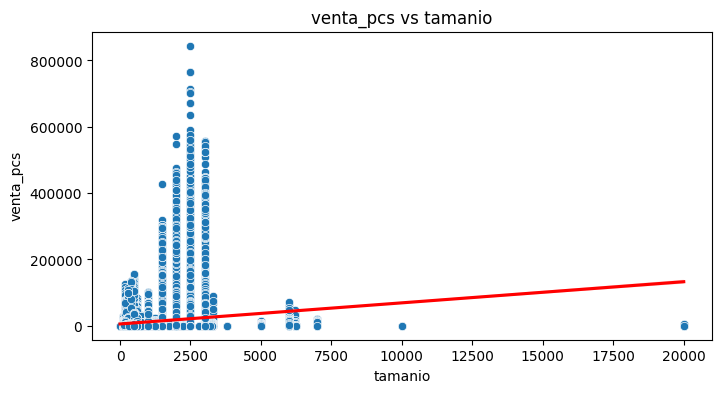

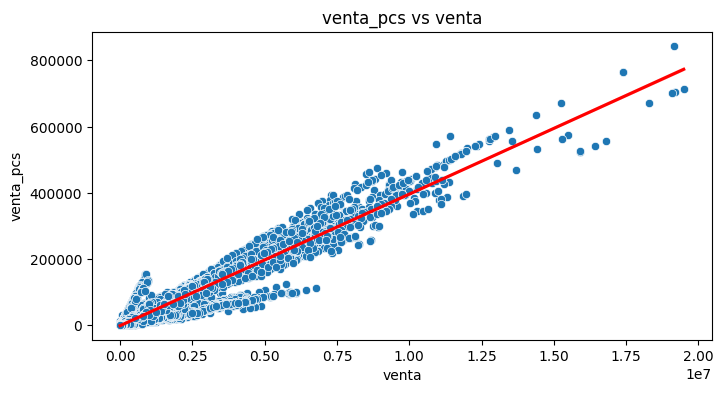

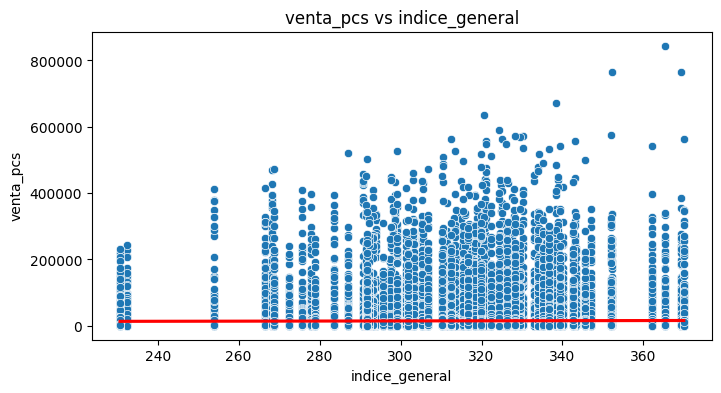

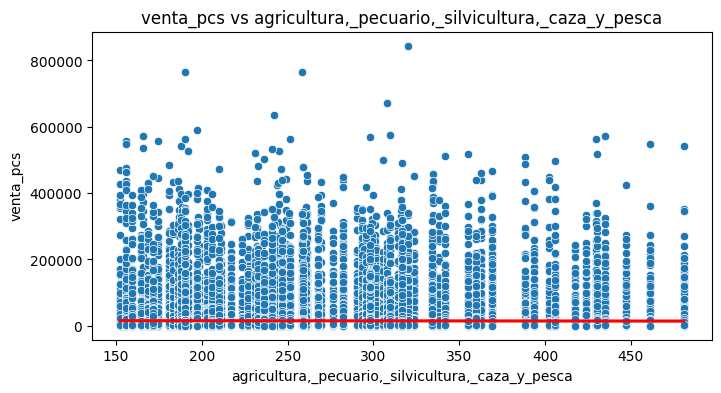

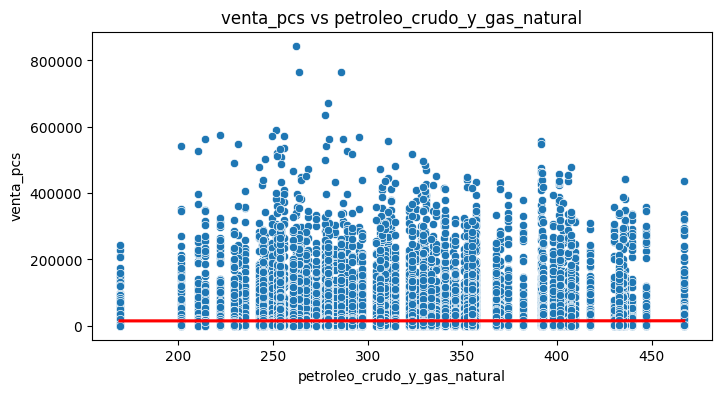

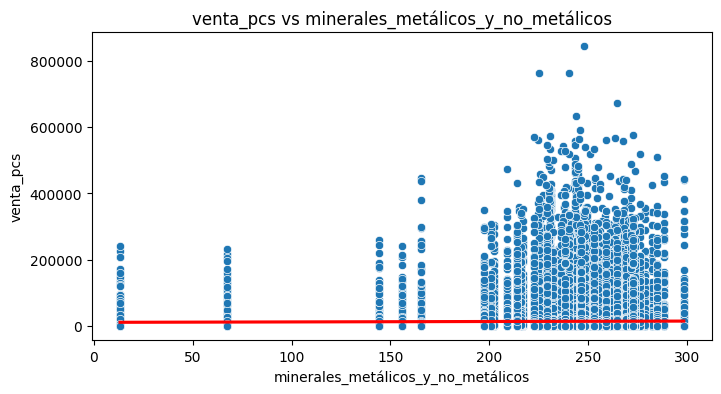

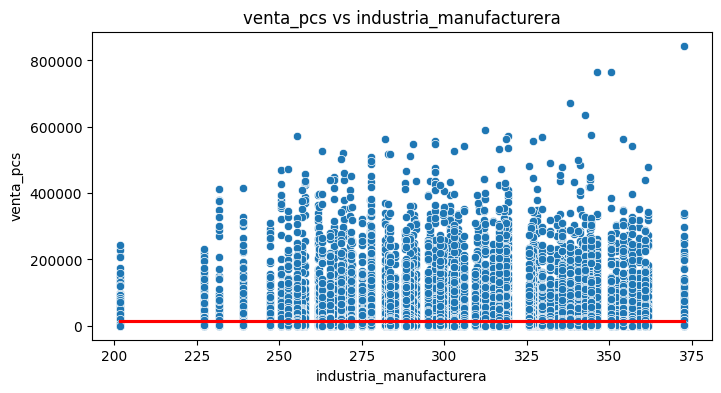

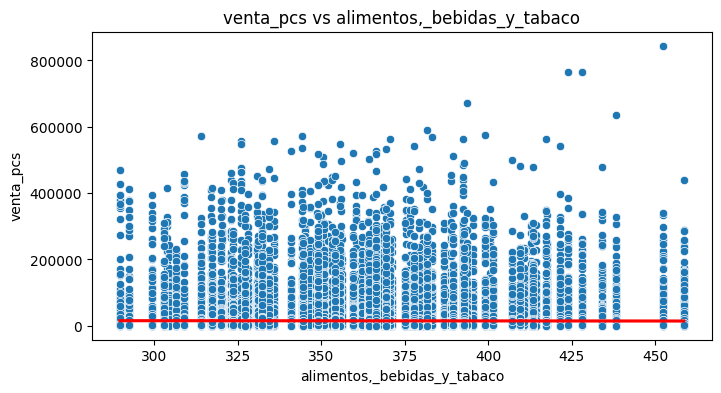

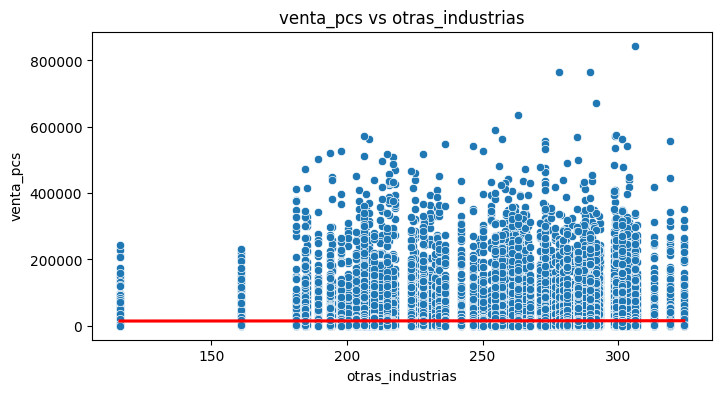

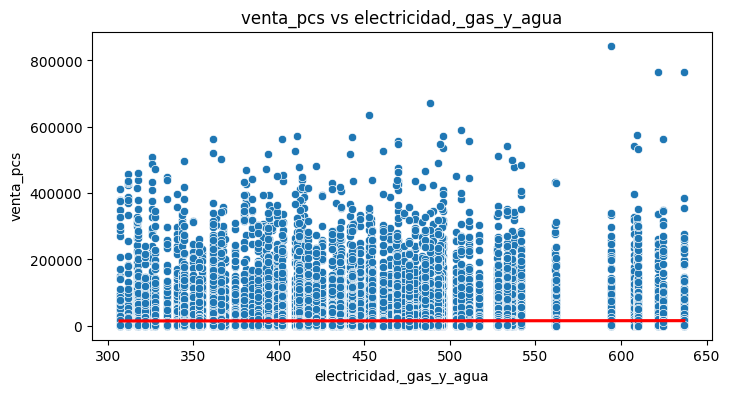

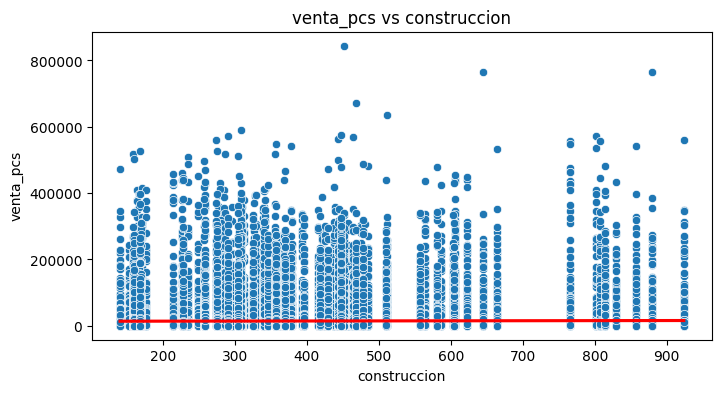

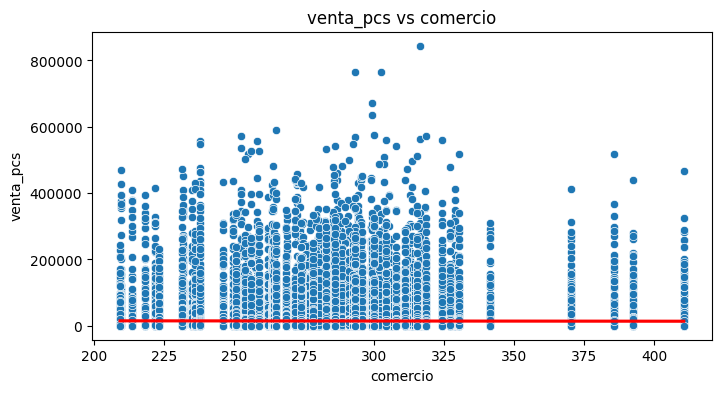

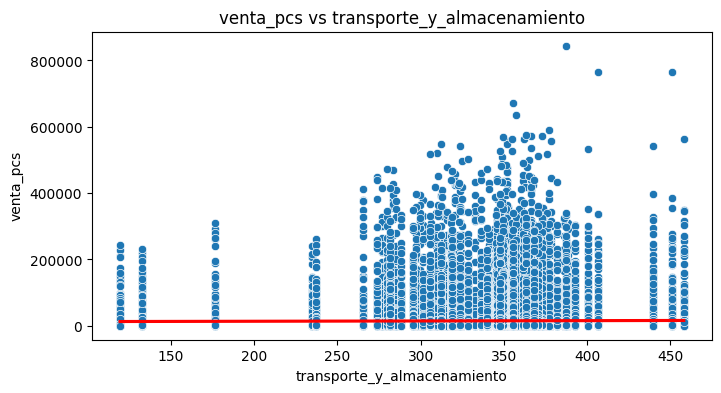

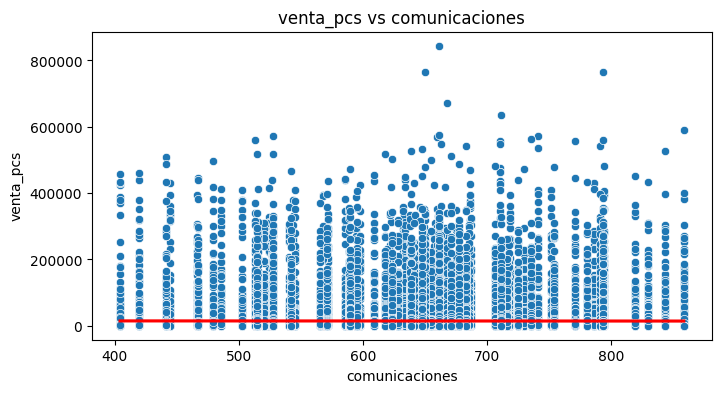

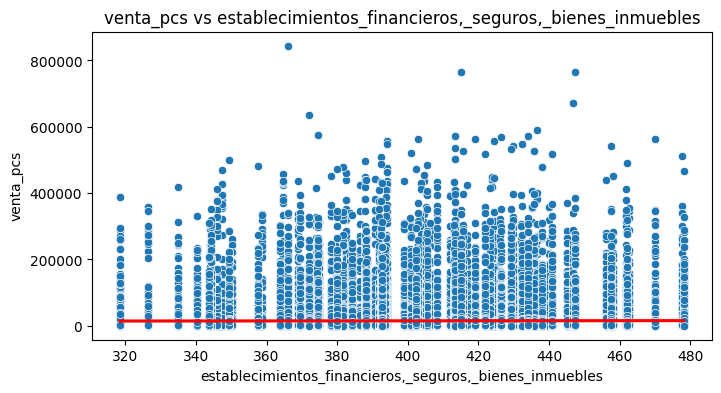

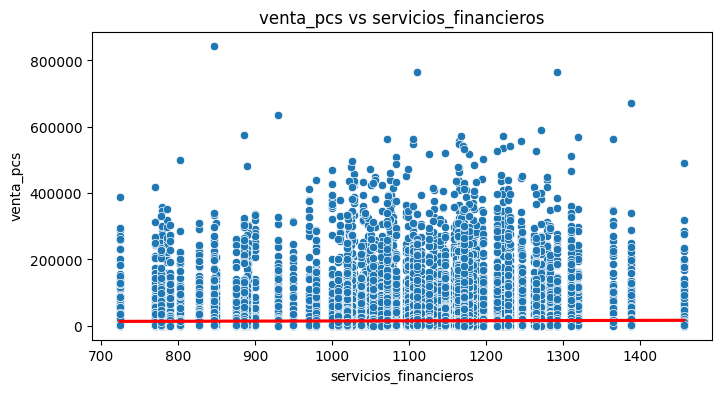

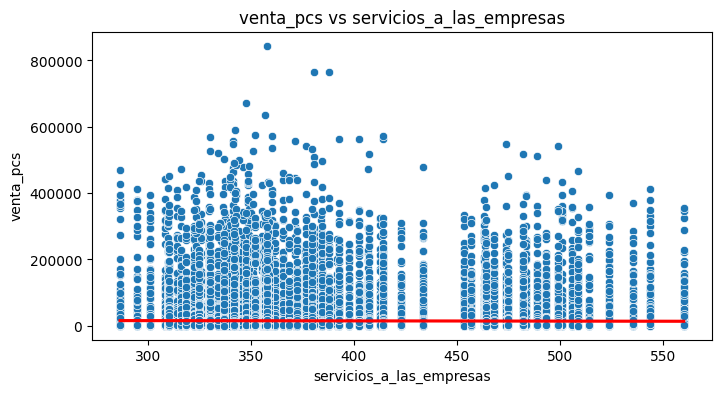

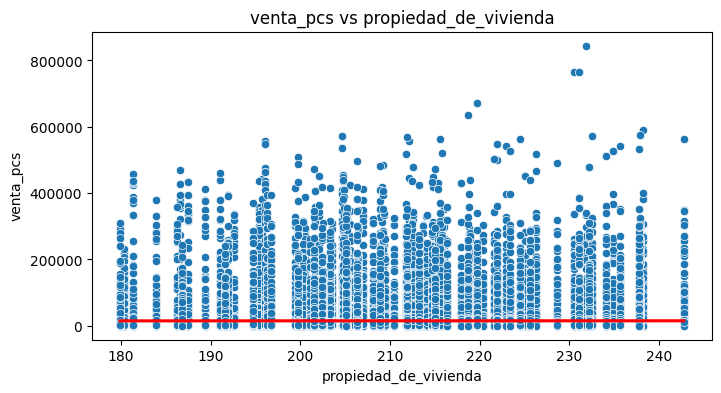

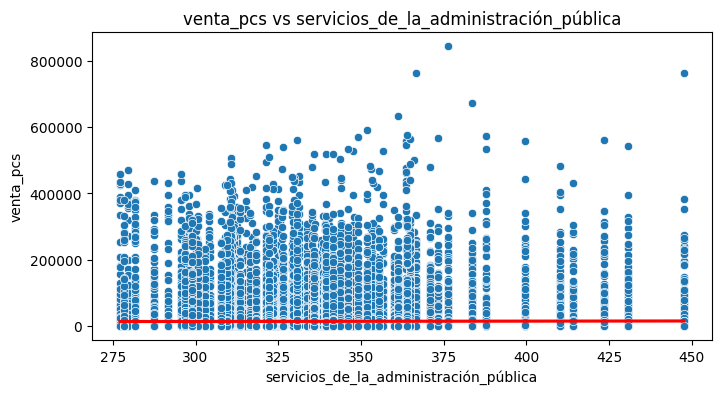

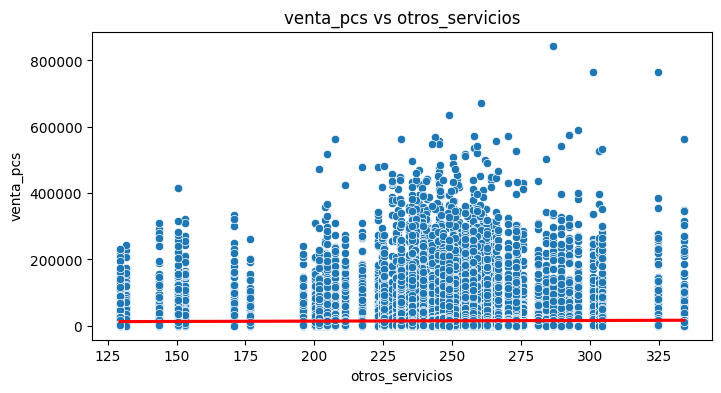

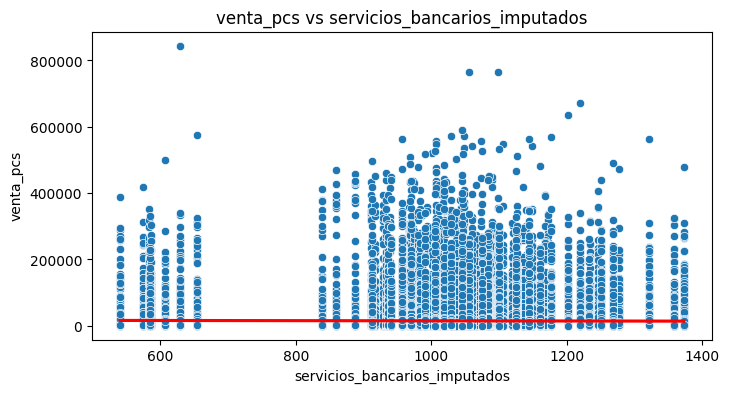

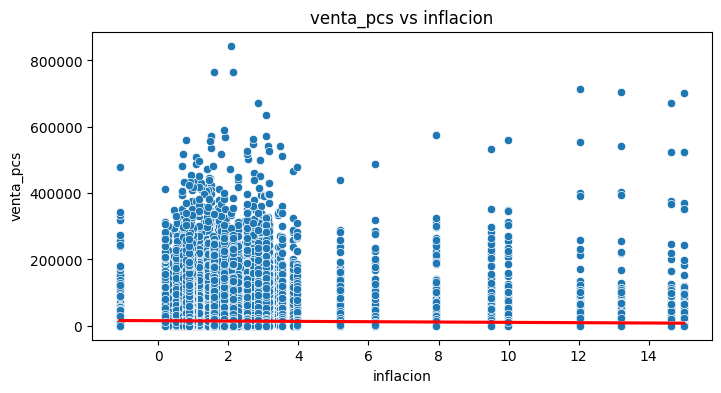

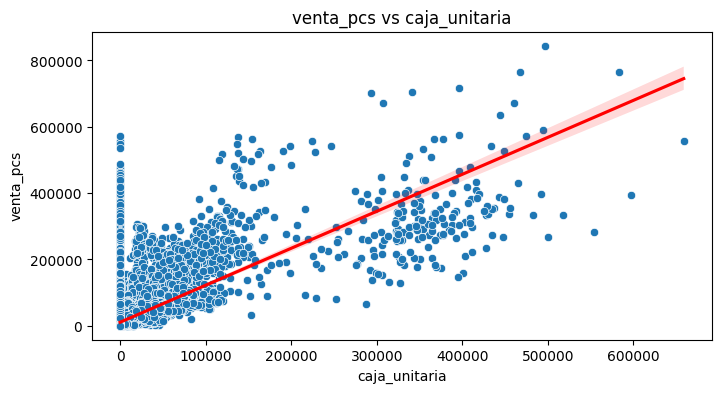

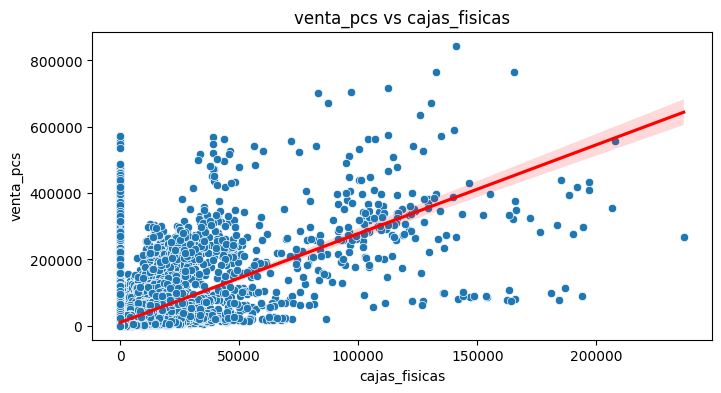

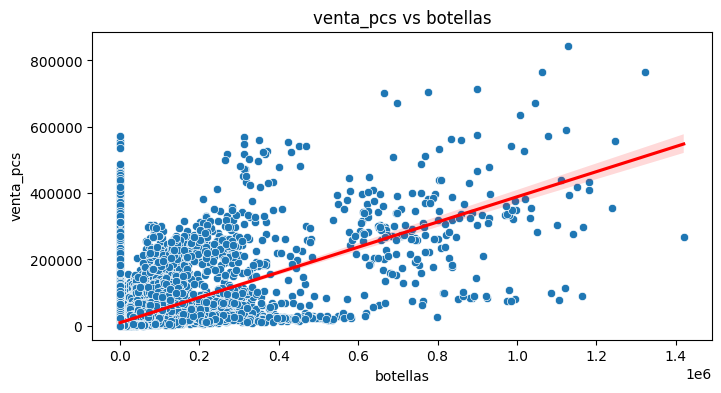

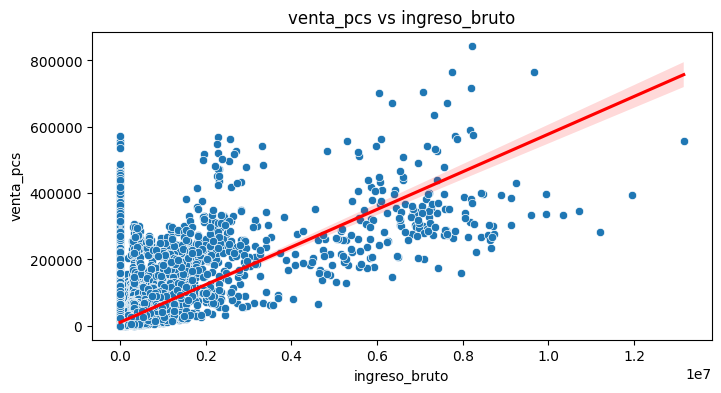

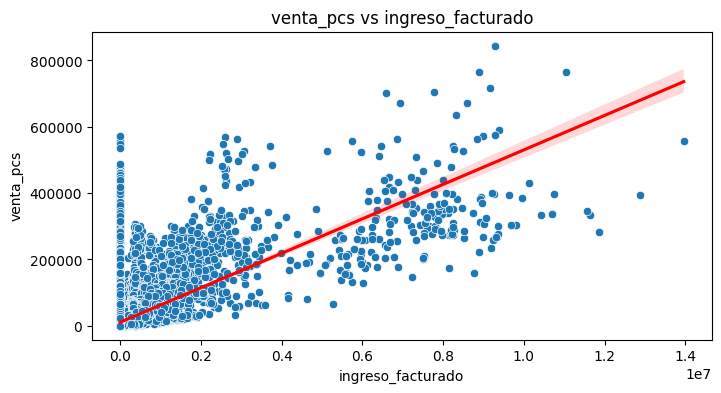

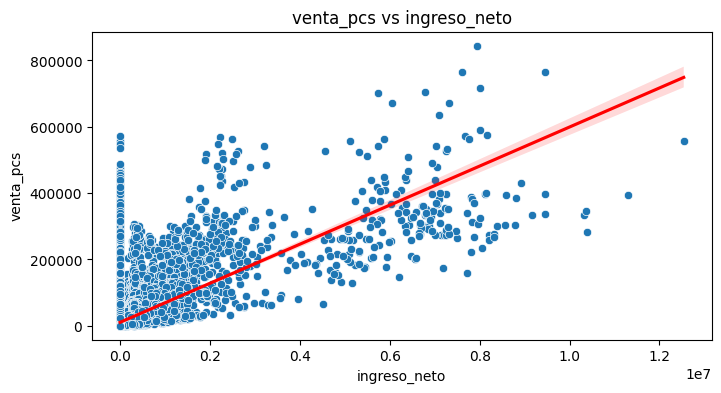

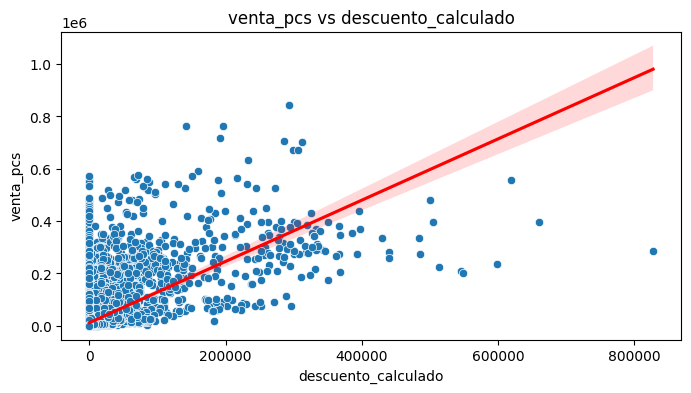

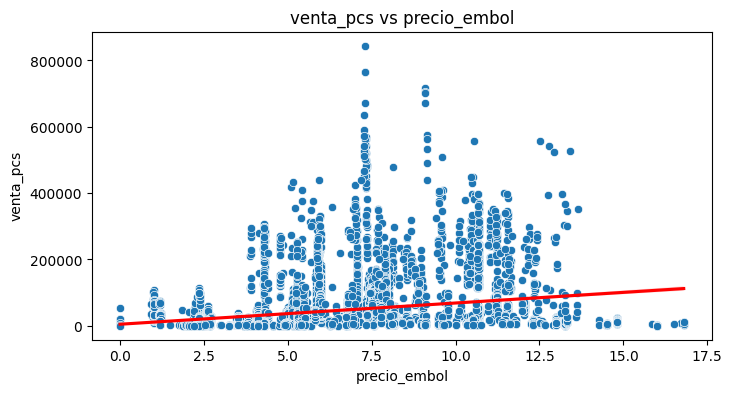

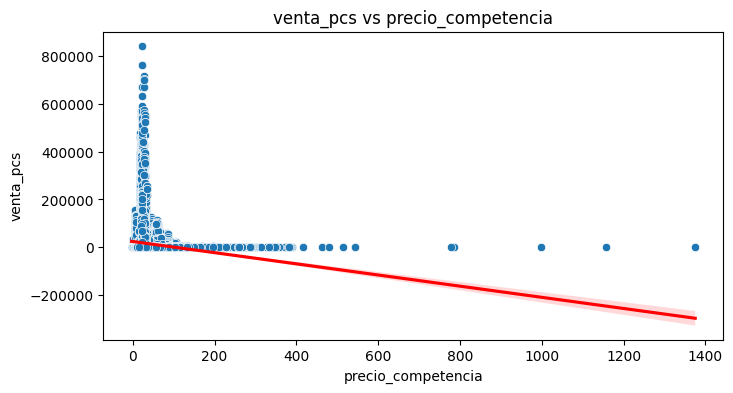

In [ ]:
# Análisis bivariado para variable objetivo en competencia
for col in numeric_cols:
    if col != target_col:
        plt.figure(figsize=(8,4))
        sns.scatterplot(x=col, y=target_col, data=df[df[target_col] > 0])
        sns.regplot(x=col, y=target_col, data=df[df[target_col] > 0], scatter=False, color="red")  # línea de tendencia
        plt.title(f"{target_col} vs {col}")
        plt.show()

# Conclusiones

-- Estructura y calidad de datos

* Se identificaron el tipo de columnas y variables.

* Se identificaros valores vacios o nulos principalmente en la columnas precios embol e inflasión, una ves analizada la información se detecto que esta información es correcta ya que la columnas precios embol solo tienen información para los casos que el la empresa corresponda a "Embol" y la variable inflación solo cuenta con información hasta la gestión 2024, que es la ultima fuente vigente.


* Se encontraron outliers en variables numéricas (tamaño, precios, ingresos) detectados con IQR y Z-score, los cuales revisando la data corresponden a la categoria bebidas energizantes los cuales no seran considerados en el analisis del modelo final al representar solo el share de volumen inferior al 1%.



* Se exploraron tendencias de ventas, ingresos y botellas a lo largo de los años, observándose patrones que sugieren estacionalidad.

* Se realizó una primera comparación entre Embol y la competencia, con histogramas y análisis bivariados de ventas, aunque de forma separada.


-- Próximos pasos

* Definir las variables relevantes para el armado del modelo
* Calcular los delta precio y delta cantidad de las empresas para el realizar el calculo de las elasticidades ya sea de manera mensual o por gestion.

* Profundizar en la segmentación por categoría de producto, región o canal para capturar diferencias en el comportamiento de la demanda.

# Avance 2: Ingeniería de caracteristicas (FE)

In [ ]:
# Set pandas options to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, f_classif
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


Variables macroeconómicas encontradas: 20

>>> Variables a ELIMINAR (correlación < 0.01): 0
>>> Variables a MANTENER (correlación >= 0.01): 20


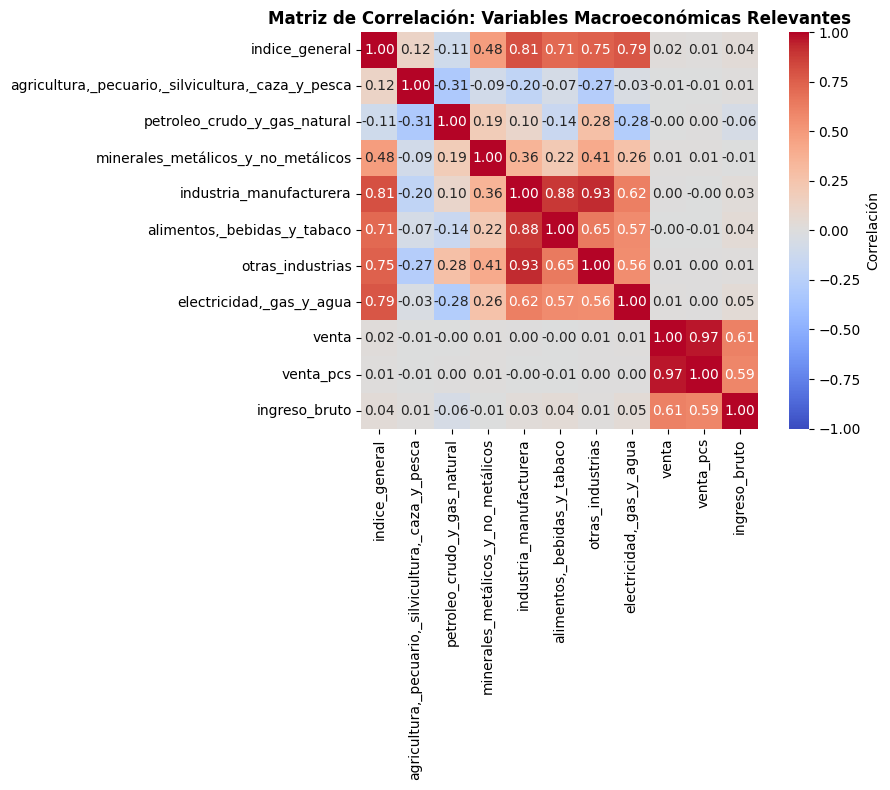


Columnas eliminadas: 0
Dimensiones actuales: (63527, 40)


In [ ]:
# ==============================================================================================
# ANÁLISIS DE CORRELACIÓN DE VARIABLES MACROECONÓMICAS PARA ELIMINACIÓN O MANTENIMIENTO
# ===============================================================================================

# Identificar variables macroeconómicas
variables_macro = [
    'indice_general',
    'agricultura,_pecuario,_silvicultura,_caza_y_pesca',
    'petroleo_crudo_y_gas_natural',
    'minerales_metálicos_y_no_metálicos',
    'industria_manufacturera',
    'alimentos,_bebidas_y_tabaco',
    'otras_industrias',
    'electricidad,_gas_y_agua',
    'construccion',
    'comercio',
    'transporte_y_almacenamiento',
    'comunicaciones',
    'establecimientos_financieros,_seguros,_bienes_inmuebles',
    'servicios_financieros',
    'servicios_a_las_empresas',
    'propiedad_de_vivienda',
    'servicios_de_la_administración_pública',
    'otros_servicios',
    'servicios_bancarios_imputados',
    'inflacion'
]

# Variables objetivo
variables_objetivo = ['venta', 'venta_pcs', 'ingreso_bruto']

# Filtrar solo las que existen en el dataframe
variables_macro = [v for v in variables_macro if v in df.columns]
variables_objetivo = [v for v in variables_objetivo if v in df.columns]

print(f"\nVariables macroeconómicas encontradas: {len(variables_macro)}")

# Calcular correlaciones
vars_para_corr = variables_macro + variables_objetivo
df_corr = df[vars_para_corr].copy()

# Reemplazar infinitos antes de calcular correlación
df_corr = df_corr.replace([np.inf, -np.inf], np.nan)

matriz_correlacion = df_corr.corr()

# Extraer correlaciones con variables objetivo
correlaciones_con_objetivo = pd.DataFrame()
for var_objetivo in variables_objetivo:
    if var_objetivo in matriz_correlacion.columns:
        correlaciones_con_objetivo[var_objetivo] = matriz_correlacion[var_objetivo][variables_macro]

# Calcular correlación máxima absoluta
max_corr_abs = correlaciones_con_objetivo.abs().max(axis=1)

# Umbral de correlación
umbral_correlacion = 0.010
vars_a_eliminar = max_corr_abs[max_corr_abs < umbral_correlacion].index.tolist()
vars_a_mantener = max_corr_abs[max_corr_abs >= umbral_correlacion].index.tolist()

print(f"\n>>> Variables a ELIMINAR (correlación < {umbral_correlacion}): {len(vars_a_eliminar)}")
print(f">>> Variables a MANTENER (correlación >= {umbral_correlacion}): {len(vars_a_mantener)}")

# Visualización simplificada
if len(vars_a_mantener) > 0:
    plt.figure(figsize=(10, 8))
    vars_viz = (vars_a_mantener[:8] if len(vars_a_mantener) > 8 else vars_a_mantener) + variables_objetivo[:3]
    matriz_visual = df_corr[vars_viz].corr()

    sns.heatmap(matriz_visual, annot=True, fmt='.2f', cmap='coolwarm',
                center=0, vmin=-1, vmax=1, square=True, cbar_kws={'label': 'Correlación'})
    plt.title('Matriz de Correlación: Variables Macroeconómicas Relevantes', fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Aplicar eliminación
df_clean = df.drop(columns=vars_a_eliminar, errors='ignore')
print(f"\nColumnas eliminadas: {len(vars_a_eliminar)}")
print(f"Dimensiones actuales: {df_clean.shape}")



Rango de años: 1483228800000000000 - 1735689600000000000
Rango de meses: 1 - 12

✓ Variables temporales creadas:
  - mes_num: 1-12
  - anio_num: año numérico
  - periodo_continuo: año*12 + mes
  - periodo_normalizado: [0,1]


<>:18: SyntaxWarning: invalid escape sequence '\d'
<>:18: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-221479435.py:18: SyntaxWarning: invalid escape sequence '\d'
  df_clean['anio_num'] = df_clean['anio'].astype(str).str.extract('(\d{4})')[0].astype(float).astype('Int64')


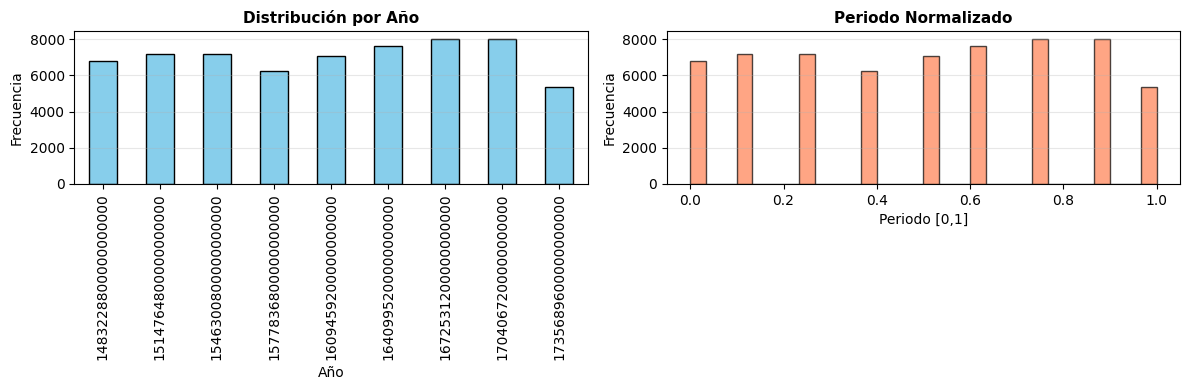

In [ ]:
# ================================================================================
#  ESTANDARIZACIÓN DE VARIABLES ORDINALES (AÑO Y MES)
# ================================================================================

# Diccionario de meses
meses_orden = {
    'enero': 1, 'febrero': 2, 'marzo': 3, 'abril': 4,
    'mayo': 5, 'junio': 6, 'julio': 7, 'agosto': 8,
    'septiembre': 9, 'octubre': 10, 'noviembre': 11, 'diciembre': 12
}

# Convertir mes a numérico
df_clean['mes_num'] = df_clean['mes'].map(meses_orden)

# Convertir año a numérico (manejo robusto de diferentes formatos)
if df_clean['anio'].dtype == 'object':
    # Extraer solo los primeros 4 dígitos si es string
    df_clean['anio_num'] = df_clean['anio'].astype(str).str.extract('(\d{4})')[0].astype(float).astype('Int64')
else:
    # Si ya es numérico
    df_clean['anio_num'] = pd.to_numeric(df_clean['anio'], errors='coerce').astype('Int64')

print(f"\nRango de años: {df_clean['anio_num'].min()} - {df_clean['anio_num'].max()}")
print(f"Rango de meses: {df_clean['mes_num'].min()} - {df_clean['mes_num'].max()}")

# Crear periodo continuo
df_clean['periodo_continuo'] = df_clean['anio_num'].astype(int) * 12 + df_clean['mes_num'].astype(int)

# Normalizar periodo [0, 1]
from sklearn.preprocessing import MinMaxScaler
scaler_periodo = MinMaxScaler()
df_clean['periodo_normalizado'] = scaler_periodo.fit_transform(
    df_clean[['periodo_continuo']]
)

print("\n✓ Variables temporales creadas:")
print("  - mes_num: 1-12")
print("  - anio_num: año numérico")
print("  - periodo_continuo: año*12 + mes")
print("  - periodo_normalizado: [0,1]")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

df_clean['anio_num'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Distribución por Año', fontweight='bold', fontsize=11)
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(axis='y', alpha=0.3)

axes[1].hist(df_clean['periodo_normalizado'], bins=30, color='coral', edgecolor='black', alpha=0.7)
axes[1].set_title('Periodo Normalizado', fontweight='bold', fontsize=11)
axes[1].set_xlabel('Periodo [0,1]')
axes[1].set_ylabel('Frecuencia')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# ================================================================================
# BINNING DE TAMAÑOS DE BOTELLAS
# ================================================================================
df['tamanio_grupo'] = pd.cut(df['tamanio'],
                             bins=[0, 999, np.inf],
                             labels=['pequeno', 'grande'])



Variables numéricas a estandarizar: 32

--- Limpiando datos antes de escalar ---
  precio_competencia: 390 valores infinitos

✓ Datos limpiados (infinitos y NaN reemplazados por mediana)

✓ Variables estandarizadas agregadas con sufijo '_zscore'
✓ Dimensiones finales: (63527, 76)

Verificación Z-score:
  Media promedio: 0.000000 (esperado: ~0)
  Std promedio:   1.000008 (esperado: ~1)


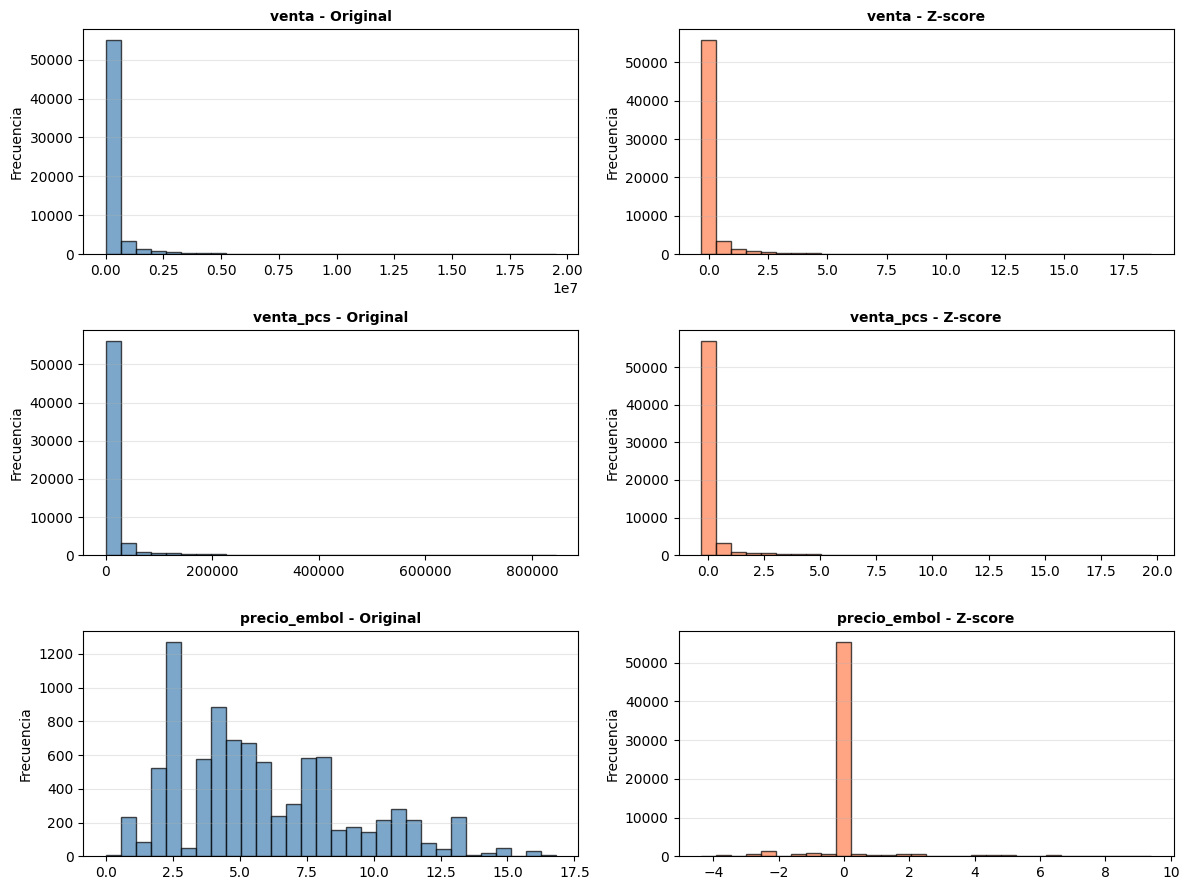

In [ ]:
# ================================================================================
# ESTANDARIZACIÓN DE VARIABLES NUMÉRICAS
# ================================================================================

from sklearn.preprocessing import StandardScaler

# Seleccionar variables numéricas
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
exclude_cols = ['periodo_continuo', 'periodo_normalizado', 'mes_num', 'anio_num']
numeric_cols_to_scale = [col for col in numeric_cols if col not in exclude_cols]

print(f"\nVariables numéricas a estandarizar: {len(numeric_cols_to_scale)}")

# Función para limpiar datos
def limpiar_datos(series):
    """Reemplaza infinitos y NaN con la mediana"""
    # Reemplazar infinitos con NaN
    series_clean = series.replace([np.inf, -np.inf], np.nan)
    # Calcular mediana sin NaN
    mediana = series_clean.median()
    # Reemplazar NaN con mediana
    series_clean = series_clean.fillna(mediana)
    return series_clean

# Preparar datos para escalado
df_to_scale = df_clean[numeric_cols_to_scale].copy()

print("\n--- Limpiando datos antes de escalar ---")
# Verificar valores infinitos
inf_counts = {}
for col in numeric_cols_to_scale:
    n_inf = np.isinf(df_to_scale[col]).sum()
    if n_inf > 0:
        inf_counts[col] = n_inf
        print(f"  {col}: {n_inf} valores infinitos")

# Limpiar cada columna
for col in numeric_cols_to_scale:
    df_to_scale[col] = limpiar_datos(df_to_scale[col])

print("\n✓ Datos limpiados (infinitos y NaN reemplazados por mediana)")

# Estandarización Z-score
scaler = StandardScaler()

try:
    df_scaled_values = scaler.fit_transform(df_to_scale)

    df_scaled = pd.DataFrame(
        df_scaled_values,
        columns=[f'{col}_zscore' for col in numeric_cols_to_scale],
        index=df_clean.index
    )

    # Agregar al dataframe principal
    df_clean = pd.concat([df_clean, df_scaled], axis=1)

    print("\n✓ Variables estandarizadas agregadas con sufijo '_zscore'")
    print(f"✓ Dimensiones finales: {df_clean.shape}")

    # Verificar estandarización
    print(f"\nVerificación Z-score:")
    print(f"  Media promedio: {df_scaled.mean().mean():.6f} (esperado: ~0)")
    print(f"  Std promedio:   {df_scaled.std().mean():.6f} (esperado: ~1)")

except Exception as e:
    print(f"\n⚠ Error en estandarización: {e}")
    print("Continuando sin estandarización...")

# Visualización de algunas variables
vars_viz = ['venta', 'venta_pcs', 'precio_embol', 'botellas']
vars_viz = [v for v in vars_viz if v in numeric_cols_to_scale]

if len(vars_viz) > 0 and f'{vars_viz[0]}_zscore' in df_clean.columns:
    n_vars = min(3, len(vars_viz))
    fig, axes = plt.subplots(n_vars, 2, figsize=(12, 3*n_vars))

    if n_vars == 1:
        axes = axes.reshape(1, -1)

    for i, var in enumerate(vars_viz[:n_vars]):
        # Original
        axes[i, 0].hist(df_clean[var].dropna(), bins=30, color='steelblue',
                       edgecolor='black', alpha=0.7)
        axes[i, 0].set_title(f'{var} - Original', fontweight='bold', fontsize=10)
        axes[i, 0].set_ylabel('Frecuencia')
        axes[i, 0].grid(axis='y', alpha=0.3)

        # Z-score
        axes[i, 1].hist(df_clean[f'{var}_zscore'].dropna(), bins=30, color='coral',
                       edgecolor='black', alpha=0.7)
        axes[i, 1].set_title(f'{var} - Z-score', fontweight='bold', fontsize=10)
        axes[i, 1].set_ylabel('Frecuencia')
        axes[i, 1].grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()



Registros válidos para análisis: 8,892

CORRELACIÓN PRECIO vs DEMANDA
Pearson:    0.2699  (p-value: 2.9655e-148)
Spearman:   0.3825  (p-value: 1.1109e-307)
✓ Correlación estadísticamente significativa (p < 0.05)


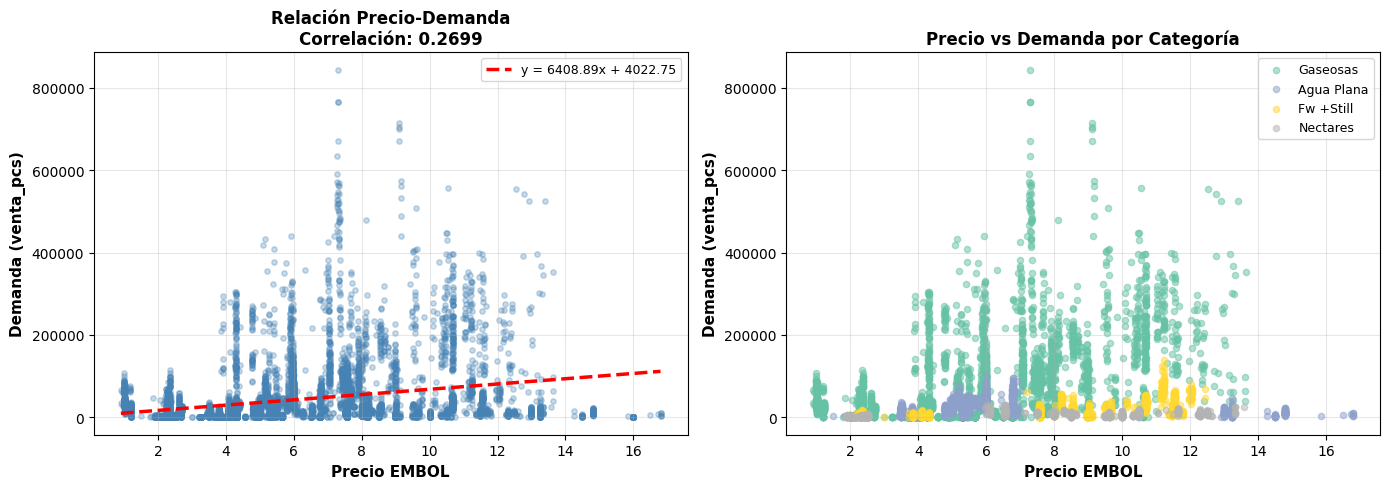


ANÁLISIS DE ELASTICIDAD POR DECILES
 decil_precio  precio_embol    venta_pcs
            0      1.734647 15467.118844
            1      2.335827 13156.349882
            2      3.219978  7456.744237
            3      4.182774 28713.513423
            4      4.945423 30023.600232
            5      5.552900 49487.913774
            6      6.712297 76936.189011
            7      7.850033 46977.370699
            8      9.502248 74398.566628
            9     12.335097 71141.603193


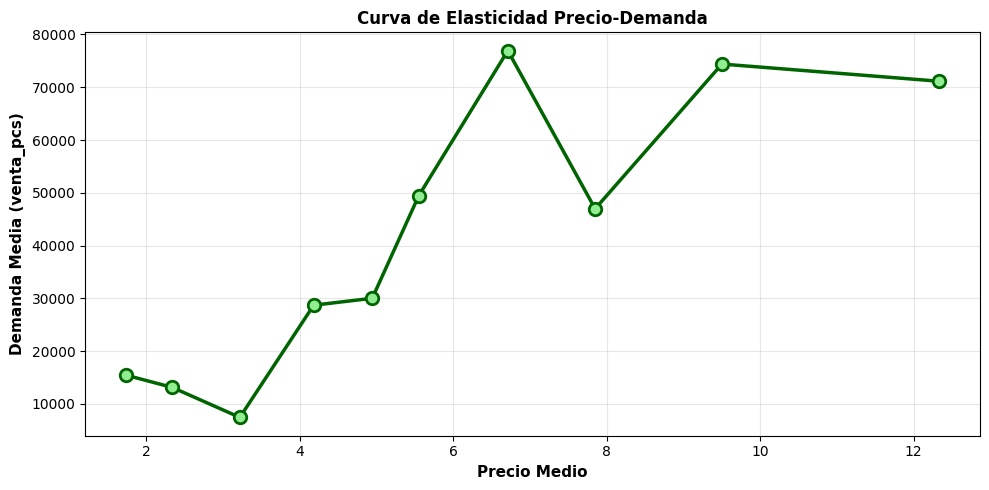

In [ ]:
# ================================================================================
# ANÁLISIS BIVARIANTE - DEMANDA VS PRECIO
# ================================================================================

# Filtrar datos válidos y limpiar infinitos
df_analisis = df_clean[['precio_embol', 'venta_pcs', 'categoria_embol', 'operacion']].copy()
df_analisis = df_analisis.replace([np.inf, -np.inf], np.nan)
df_analisis = df_analisis[(df_analisis['precio_embol'] > 0) &
                          (df_analisis['venta_pcs'] > 0)].dropna()

print(f"\nRegistros válidos para análisis: {len(df_analisis):,}")

if len(df_analisis) > 100:
    from scipy.stats import pearsonr, spearmanr

    # Correlaciones
    corr_pearson, p_pearson = pearsonr(df_analisis['precio_embol'], df_analisis['venta_pcs'])
    corr_spearman, p_spearman = spearmanr(df_analisis['precio_embol'], df_analisis['venta_pcs'])

    print(f"\n{'='*60}")
    print("CORRELACIÓN PRECIO vs DEMANDA")
    print(f"{'='*60}")
    print(f"Pearson:  {corr_pearson:>8.4f}  (p-value: {p_pearson:.4e})")
    print(f"Spearman: {corr_spearman:>8.4f}  (p-value: {p_spearman:.4e})")

    if p_pearson < 0.05:
        print("✓ Correlación estadísticamente significativa (p < 0.05)")
    else:
        print("✗ Correlación NO significativa (p >= 0.05)")

    # Visualización principal
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Scatter plot con tendencia
    axes[0].scatter(df_analisis['precio_embol'], df_analisis['venta_pcs'],
                   alpha=0.3, s=15, color='steelblue')

    # Línea de tendencia
    z = np.polyfit(df_analisis['precio_embol'], df_analisis['venta_pcs'], 1)
    p_poly = np.poly1d(z)
    x_line = np.linspace(df_analisis['precio_embol'].min(),
                         df_analisis['precio_embol'].max(), 100)
    axes[0].plot(x_line, p_poly(x_line), "r--", linewidth=2.5,
                label=f'y = {z[0]:.2f}x + {z[1]:.2f}')

    axes[0].set_xlabel('Precio EMBOL', fontweight='bold', fontsize=11)
    axes[0].set_ylabel('Demanda (venta_pcs)', fontweight='bold', fontsize=11)
    axes[0].set_title(f'Relación Precio-Demanda\nCorrelación: {corr_pearson:.4f}',
                     fontweight='bold', fontsize=12)
    axes[0].legend(fontsize=9)
    axes[0].grid(True, alpha=0.3)

    # Por categoría (top 4)
    categorias = df_analisis['categoria_embol'].value_counts().head(4).index
    colors = plt.cm.Set2(np.linspace(0, 1, len(categorias)))

    for i, cat in enumerate(categorias):
        df_cat = df_analisis[df_analisis['categoria_embol'] == cat]
        axes[1].scatter(df_cat['precio_embol'], df_cat['venta_pcs'],
                       alpha=0.5, s=20, label=cat, color=colors[i])

    axes[1].set_xlabel('Precio EMBOL', fontweight='bold', fontsize=11)
    axes[1].set_ylabel('Demanda (venta_pcs)', fontweight='bold', fontsize=11)
    axes[1].set_title('Precio vs Demanda por Categoría', fontweight='bold', fontsize=12)
    axes[1].legend(fontsize=9, loc='best')
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Análisis de elasticidad
    try:
        df_analisis['decil_precio'] = pd.qcut(df_analisis['precio_embol'],
                                              q=10, labels=False, duplicates='drop')

        elasticidad = df_analisis.groupby('decil_precio').agg({
            'precio_embol': 'mean',
            'venta_pcs': 'mean'
        }).reset_index()

        print(f"\n{'='*60}")
        print("ANÁLISIS DE ELASTICIDAD POR DECILES")
        print(f"{'='*60}")
        print(elasticidad.to_string(index=False))

        # Curva de elasticidad
        plt.figure(figsize=(10, 5))
        plt.plot(elasticidad['precio_embol'], elasticidad['venta_pcs'],
                marker='o', linewidth=2.5, markersize=9, color='darkgreen',
                markerfacecolor='lightgreen', markeredgewidth=2)
        plt.xlabel('Precio Medio', fontweight='bold', fontsize=11)
        plt.ylabel('Demanda Media (venta_pcs)', fontweight='bold', fontsize=11)
        plt.title('Curva de Elasticidad Precio-Demanda', fontweight='bold', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"\n⚠ No se pudo calcular elasticidad: {e}")

else:
    print("\n⚠ Datos insuficientes para análisis bivariante")



Variables para PCA: 12
Observaciones válidas: 63,527

Varianza de primeros 5 componentes:
  PC1: 39.75%  (Acumulado: 39.75%)
  PC2: 16.87%  (Acumulado: 56.62%)
  PC3: 13.16%  (Acumulado: 69.78%)
  PC4:  8.12%  (Acumulado: 77.89%)
  PC5:  7.81%  (Acumulado: 85.71%)

Componentes para 80% varianza: 5
Componentes para 90% varianza: 6


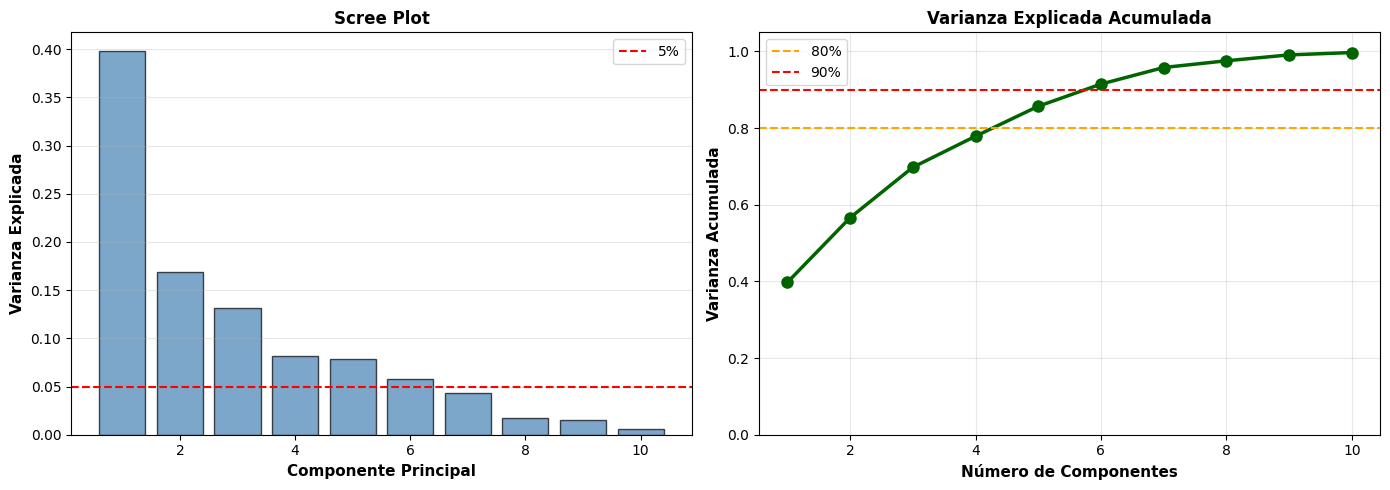

In [ ]:
# ================================================================================
# PCA Y ANOVA
# ================================================================================

from sklearn.decomposition import PCA

# Seleccionar variables para PCA (máximo 12 variables)
vars_pca = [col for col in numeric_cols_to_scale[:12]
            if col in df_clean.columns and df_clean[col].notna().sum() > 1000]

print(f"\nVariables para PCA: {len(vars_pca)}")

# Preparar datos sin NaN ni infinitos
df_pca = df_clean[vars_pca].copy()
for col in vars_pca:
    df_pca[col] = limpiar_datos(df_pca[col])

df_pca = df_pca.dropna()

print(f"Observaciones válidas: {len(df_pca):,}")

if len(df_pca) > 100 and len(vars_pca) > 1:
    # Estandarizar
    scaler_pca = StandardScaler()
    X_scaled = scaler_pca.fit_transform(df_pca)

    # Aplicar PCA
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)

    varianza = pca.explained_variance_ratio_
    varianza_acum = np.cumsum(varianza)

    # Componentes necesarios
    n_comp_80 = np.argmax(varianza_acum >= 0.80) + 1
    n_comp_90 = np.argmax(varianza_acum >= 0.90) + 1

    print(f"\nVarianza de primeros 5 componentes:")
    for i in range(min(5, len(varianza))):
        print(f"  PC{i+1}: {varianza[i]:>6.2%}  (Acumulado: {varianza_acum[i]:>6.2%})")

    print(f"\n{'='*60}")
    print(f"Componentes para 80% varianza: {n_comp_80}")
    print(f"Componentes para 90% varianza: {n_comp_90}")
    print(f"{'='*60}")

    # Visualización PCA
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Scree plot
    n_show = min(10, len(varianza))
    axes[0].bar(range(1, n_show+1), varianza[:n_show],
               color='steelblue', alpha=0.7, edgecolor='black')
    axes[0].axhline(y=0.05, color='red', linestyle='--', linewidth=1.5, label='5%')
    axes[0].set_xlabel('Componente Principal', fontweight='bold', fontsize=11)
    axes[0].set_ylabel('Varianza Explicada', fontweight='bold', fontsize=11)
    axes[0].set_title('Scree Plot', fontweight='bold', fontsize=12)
    axes[0].legend()
    axes[0].grid(axis='y', alpha=0.3)

    # Varianza acumulada
    axes[1].plot(range(1, n_show+1), varianza_acum[:n_show],
                marker='o', linewidth=2.5, markersize=8, color='darkgreen')
    axes[1].axhline(y=0.80, color='orange', linestyle='--', linewidth=1.5, label='80%')
    axes[1].axhline(y=0.90, color='red', linestyle='--', linewidth=1.5, label='90%')
    axes[1].set_xlabel('Número de Componentes', fontweight='bold', fontsize=11)
    axes[1].set_ylabel('Varianza Acumulada', fontweight='bold', fontsize=11)
    axes[1].set_title('Varianza Explicada Acumulada', fontweight='bold', fontsize=12)
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    axes[1].set_ylim([0, 1.05])

    plt.tight_layout()
    plt.show()

else:
    print("\n⚠ Datos insuficientes para PCA")






Observaciones para ANOVA: 63,527

ANOVA: VENTAS POR OPERACIÓN
F-statistic: 56.8884
P-value:     1.0536e-81
✓✓✓ Diferencias ALTAMENTE significativas (p < 0.001)

Estadísticas por Operación:
                N     Media  Desv.Est  Min       Max
operacion                                           
COCHABAMBA   9908  15365.77  49984.54  0.0  571976.0
LA PAZ      26599  13785.79  37964.65  0.0  557081.0
ORURO         592   4010.14  15850.14  0.0  122769.0
POTOSI        593   1577.38   5672.71  0.0   51046.0
RESTO       14730   9500.40  33970.03 -3.0  488240.0
SANTA CRUZ  10052  17513.39  56084.79  0.0  844443.0
SUCRE         600   1626.25   6396.48  0.0   63383.0
TARIJA        453   3000.74   9936.83  0.0   68452.0


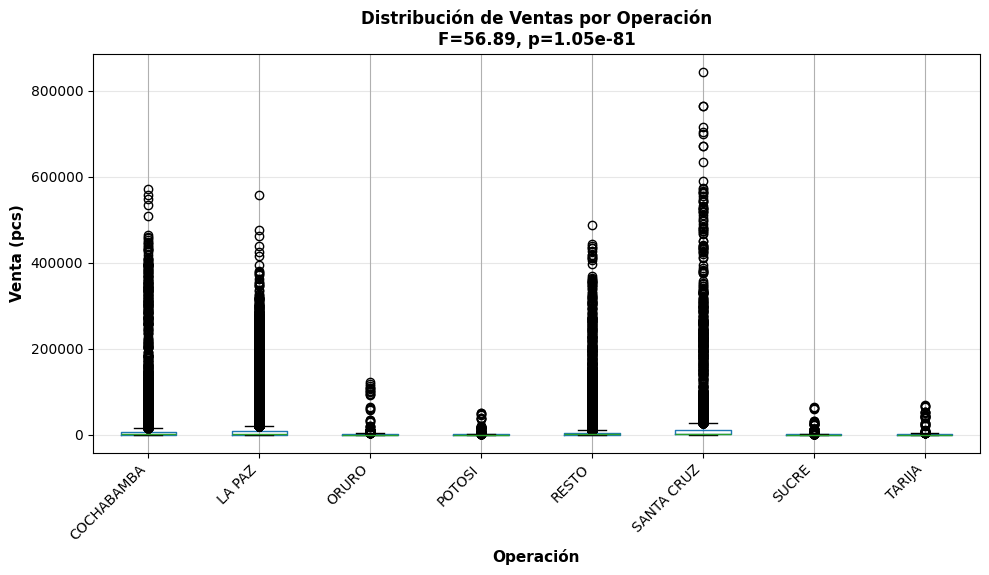


ANOVA: VENTAS POR CATEGORÍA
F-statistic: 942.4590
P-value:     0.0000e+00
✓ Diferencias significativas entre categorías


In [ ]:
# ========== ANOVA ==========

from scipy.stats import f_oneway

# Preparar datos
df_anova = df_clean[['operacion', 'categoria_embol', 'venta_pcs']].copy()
df_anova['venta_pcs'] = limpiar_datos(df_anova['venta_pcs'])
df_anova = df_anova.dropna()

print(f"\nObservaciones para ANOVA: {len(df_anova):,}")

# ANOVA por Operación
grupos_op = [grupo['venta_pcs'].values
             for nombre, grupo in df_anova.groupby('operacion')
             if len(grupo) >= 30]

if len(grupos_op) >= 2:
    f_stat, p_value = f_oneway(*grupos_op)

    print(f"\n{'='*60}")
    print("ANOVA: VENTAS POR OPERACIÓN")
    print(f"{'='*60}")
    print(f"F-statistic: {f_stat:.4f}")
    print(f"P-value:     {p_value:.4e}")

    if p_value < 0.001:
        print("✓✓✓ Diferencias ALTAMENTE significativas (p < 0.001)")
    elif p_value < 0.01:
        print("✓✓ Diferencias MUY significativas (p < 0.01)")
    elif p_value < 0.05:
        print("✓ Diferencias significativas (p < 0.05)")
    else:
        print("✗ No hay diferencias significativas (p >= 0.05)")

    # Estadísticas descriptivas
    print("\nEstadísticas por Operación:")
    stats_table = df_anova.groupby('operacion')['venta_pcs'].agg([
        ('N', 'count'),
        ('Media', 'mean'),
        ('Desv.Est', 'std'),
        ('Min', 'min'),
        ('Max', 'max')
    ]).round(2)
    print(stats_table)

    # Visualización
    fig, ax = plt.subplots(figsize=(10, 6))
    df_anova.boxplot(column='venta_pcs', by='operacion', ax=ax)
    ax.set_title(f'Distribución de Ventas por Operación\nF={f_stat:.2f}, p={p_value:.2e}',
                fontweight='bold', fontsize=12)
    plt.suptitle('')  # Remover título automático
    ax.set_xlabel('Operación', fontweight='bold', fontsize=11)
    ax.set_ylabel('Venta (pcs)', fontweight='bold', fontsize=11)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# ANOVA por Categoría
grupos_cat = [grupo['venta_pcs'].values
              for nombre, grupo in df_anova.groupby('categoria_embol')
              if len(grupo) >= 30]

if len(grupos_cat) >= 2:
    f_stat_cat, p_value_cat = f_oneway(*grupos_cat)

    print(f"\n{'='*60}")
    print("ANOVA: VENTAS POR CATEGORÍA")
    print(f"{'='*60}")
    print(f"F-statistic: {f_stat_cat:.4f}")
    print(f"P-value:     {p_value_cat:.4e}")

    if p_value_cat < 0.05:
        print("✓ Diferencias significativas entre categorías")
    else:
        print("✗ No hay diferencias significativas")

In [ ]:
# ================================================================================
# RESUMEN FINAL
# ================================================================================

print(f"\n✓ Punto 3: Variables macroeconómicas analizadas")
print(f"   - Eliminadas: {len(vars_a_eliminar)}")
print(f"   - Mantenidas: {len(vars_a_mantener)}")
print(f"\n✓ Punto 5: Variables temporales estandarizadas")
print(f"   - mes_num, periodo_continuo, periodo_normalizado")
print(f"\n✓ Punto 6: {len(numeric_cols_to_scale)} variables numéricas escaladas")
print(f"\n✓ Punto 7: Análisis bivariante completado")
if len(df_analisis) > 0:
    print(f"   - Correlación: {corr_pearson:.4f}")
print(f"\n✓ Punto 8: PCA y ANOVA completados")

print(f"DIMENSIONES FINALES: {df_clean.shape[0]:,} filas × {df_clean.shape[1]:,} columnas")



✓ Punto 3: Variables macroeconómicas analizadas
   - Eliminadas: 0
   - Mantenidas: 20

✓ Punto 5: Variables temporales estandarizadas
   - mes_num, periodo_continuo, periodo_normalizado

✓ Punto 6: 32 variables numéricas escaladas

✓ Punto 7: Análisis bivariante completado
   - Correlación: 0.2699

✓ Punto 8: PCA y ANOVA completados
DIMENSIONES FINALES: 63,527 filas × 76 columnas


# Conclusiones Avance 2

-- Ingeniería de características y preparación de datos

* Se eliminaron los registros de Nielsen y Premise correspondientes a Embol, dado que duplicaban información ya presente en la base principal y distorsionaban los análisis competitivos.

* Se reorganizó la estructura de la base mediante un pivoteo por fabricante, permitiendo disponer de los principales competidores (Pepsi, La Cascada, Pil, etc.) en columnas laterales.
Esto facilitó la comparación directa de ventas, precios y volúmenes por categoría, tamaño y período.

* Se generaron nuevas variables relevantes para el análisis de elasticidad y participación de mercado, tales como:
precio promedio de la competencia, precio relativo Embol / competencia, diferencia de precios, market share por ventas y volumen, y ratio de precios.

* Se eliminaron variables macroeconómicas sin correlación significativa con las ventas o precios, manteniendo únicamente las de mayor relación (como inflación e índice general).

* Se codificaron variables ordinales como año y mes, y se aplicó estandarización a las variables numéricas para garantizar comparabilidad y estabilidad en los modelos.

* Se realizaron transformaciones logarítmicas sobre variables con distribución sesgada (ventas, precios, market share), con el fin de reducir asimetrías y mejorar la interpretabilidad estadística.

* Se efectuaron análisis bivariantes entre precio y demanda, confirmando relaciones inversas entre el precio de Embol y su volumen de ventas, y explorando posibles efectos cruzados con la competencia.

* Se aplicaron métodos de reducción y selección de características mediante análisis de correlación, PCA y ANOVA, reduciendo la dimensionalidad sin pérdida significativa de información y priorizando variables con mayor poder explicativo.

-- Conclusiones
La base consolidada fue transformada en un conjunto de datos limpio, estructurado y comparable entre Embol y sus competidores, listo para la fase de modelado.

Las operaciones de generación, normalización y selección de características redujeron la redundancia y el ruido, mejorando la interpretabilidad y eficiencia del aprendizaje automático.

El dataset final mantiene la trazabilidad con las etapas anteriores del proceso, asegurando coherencia dentro del ciclo CRISP-ML y proporcionando una base sólida para los modelos de elasticidad de precios y market share.


# Conclusiones Avance 3

In [ ]:
# Requisitos: pandas, numpy, scikit-learn, matplotlib, seaborn
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# ---------------------
# 1) Mapeo meses y fecha (asegúrate de tener columna 'mes' con nombres en español)
# ---------------------
meses_espanol = {
    'enero':'01','febrero':'02','marzo':'03','abril':'04','mayo':'05','junio':'06',
    'julio':'07','agosto':'08','septiembre':'09','setiembre':'09','octubre':'10',
    'noviembre':'11','diciembre':'12'
}

# Si no existe 'anio_num' o 'mes_num' lo creamos
df = df.copy()  # no modificar original por accidente

# Asegurar que 'anio' sea datetime o string con año
# Si 'anio' ya es datetime64[ns] (como mencionaste), extraemos el año:
df['anio_num'] = df['anio'].astype(str).str[:4]

# Normalizamos 'mes' y mapeamos
df['mes_str'] = df['mes'].astype(str).str.lower().str.strip()
df['mes_num'] = df['mes_str'].map(meses_espanol)

# Si hay valores no mapeados, revisa df['mes_str'][df['mes_num'].isna()].unique()
if df['mes_num'].isna().any():
    print("Advertencia: algunos meses no se mapearon. Muestra ejemplos:")
    print(df.loc[df['mes_num'].isna(), ['mes', 'mes_str']].drop_duplicates().head())

# Construir fecha (primer día del mes) y usarla como índice
df['fecha'] = pd.to_datetime(df['anio_num'] + '-' + df['mes_num'] + '-01', format='%Y-%m-%d', errors='coerce')
if df['fecha'].isna().any():
    print("Advertencia: hay fechas no convertidas. Comprueba 'anio' y 'mes' problemáticos.")
df = df.set_index('fecha').sort_index()


In [ ]:

# ---------------------
# 2) Agrupar por mes: mean para features, sum para venta_pcs
# ---------------------
vars_features = ['indice_general', 'comercio', 'inflacion', 'alimentos,_bebidas_y_tabaco']
target_col = 'venta_pcs'

cols_needed = vars_features + [target_col]
# Asegurar que existan en df
miss = [c for c in cols_needed if c not in df.columns]
if miss:
    raise ValueError(f"Faltan columnas necesarias en df: {miss}")

# Resample mensual (MS = month start). Calculamos mean para features y sum para venta_pcs
agg_dict = {v: 'mean' for v in vars_features}
agg_dict[target_col] = 'sum'

df_monthly = df[cols_needed].resample('MS').agg(agg_dict)

# ---------------------
# 3) Calcular variación a 12 meses (YoY % change)
# ---------------------
# Variación en porcentaje: (valor_t / valor_t-12 - 1) * 100
df_var = df_monthly.copy()
for col in df_monthly.columns:
    df_var[col + '_var12m'] = df_monthly[col].pct_change(periods=12) * 100

# Mantener tanto el nivel mes a mes como la variación 12m (ambos útiles)
# Concatenamos niveles y variaciones
df_final = pd.concat([df_monthly, df_var[[c for c in df_var.columns if c.endswith('_var12m')]]], axis=1)

# Eliminar filas con NaN en las variaciones (primeros 12 meses)
df_final = df_final.dropna(subset=[c + '_var12m' for c in cols_needed])


In [ ]:
# ---------------------
# 4) Dataset para modelar
#    Opción A (recomendada en series macro): predecir la variación 12m de venta_pcs
#    Features: variación 12m de indice_general, comercio, inflacion, alimentos...
#    Target: venta_pcs_var12m
#    (También dejo alternativa para predecir nivel suma mensual)
# ---------------------
feature_vars_12m = [v + '_var12m' for v in vars_features]
target_var_12m = target_col + '_var12m'   # objetivo: variación 12m de venta_pcs

dataset = df_final[feature_vars_12m + [target_var_12m]].dropna()

# Alternativa: predecir nivel (suma mensual)
dataset_nivel = df_final[vars_features + [target_col]].dropna()

In [ ]:
# ---------------------
# 5) División temporal Train / Test (no aleatoria)
# ---------------------
# Usamos los últimos 20% de observaciones como test (respetando orden temporal)
def temporal_train_test_split(df_data, test_size=0.2):
    n = len(df_data)
    n_test = int(np.round(n * test_size))
    n_train = n - n_test
    df_train = df_data.iloc[:n_train].copy()
    df_test = df_data.iloc[n_train:].copy()
    return df_train, df_test

# Para la variante 12m
df_tr, df_te = temporal_train_test_split(dataset, test_size=0.2)
X_train = df_tr[feature_vars_12m].values
y_train = df_tr[target_var_12m].values
X_test = df_te[feature_vars_12m].values
y_test = df_te[target_var_12m].values

# Escalado (útil para métodos lineales / knn). Escalamos features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------

In [ ]:
# 6) Modelos a probar (incluye RandomForest obligatoriamente)
# ---------------------
modelos = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01, max_iter=5000),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

# Note: Para simplicidad usamos versiones por defecto; hacer GridSearchCV para tuning posterior

resultados = []
for name, model in modelos.items():
    # Para evitar problemas con modelos que no aceptan NaN/inf, nos aseguramos arrays limpios
    # Usamos X_scaled para todos (está bien incluso para árboles, no perjudica)
    model.fit(X_train_scaled, y_train)
    pred_train = model.predict(X_train_scaled)
    pred_test = model.predict(X_test_scaled)

    def metrics(y_true, y_pred):
        mae = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        r2 = r2_score(y_true, y_pred)
        return mae, rmse, r2

    mae_tr, rmse_tr, r2_tr = metrics(y_train, pred_train)
    mae_te, rmse_te, r2_te = metrics(y_test, pred_test)

    resultados.append({
        'modelo': name,
        'MAE_train': mae_tr, 'RMSE_train': rmse_tr, 'R2_train': r2_tr,
        'MAE_test': mae_te,  'RMSE_test': rmse_te,  'R2_test': r2_te,
        'dif_R2': r2_tr - r2_te
    })

df_resultados = pd.DataFrame(resultados).sort_values(by='R2_test', ascending=False)
print(df_resultados)

# ---------------------

             modelo  MAE_train  RMSE_train  R2_train   MAE_test  RMSE_test  \
6               KNN   7.541951    9.915845  0.733140  15.112559  19.264995   
1             Ridge   8.395189   10.652789  0.692000  16.655409  23.429950   
2             Lasso   8.388407   10.651840  0.692055  16.712333  23.563130   
0  LinearRegression   8.388722   10.651829  0.692055  16.723695  23.578825   
4      RandomForest   3.166155    4.268017  0.950560  18.339781  23.819241   
5  GradientBoosting   0.915921    1.148011  0.996423  19.263679  26.366984   
3      DecisionTree   0.000000    0.000000  1.000000  19.379836  27.312400   

     R2_test     dif_R2  
6  -5.201880   5.935019  
1  -8.173356   8.865356  
2  -8.277939   8.969994  
0  -8.290302   8.982358  
4  -8.480721   9.431281  
5 -10.617334  11.613757  
3 -11.465373  12.465373  


In [ ]:
# 7) Evaluar sobreajuste / subajuste (interpretación rápida)
# ---------------------
# - Si R2_train >> R2_test (dif_R2 grande y positiva) => posible sobreajuste
# - Si ambos R2 bajos (ej. < 0.2) => underfitting / falta de señales
print("\nInterpretación rápida:")
for _, row in df_resultados.iterrows():
    print(f"{row['modelo']}: R2_train={row['R2_train']:.3f}, R2_test={row['R2_test']:.3f}, dif={row['dif_R2']:.3f}")



Interpretación rápida:
KNN: R2_train=0.733, R2_test=-5.202, dif=5.935
Ridge: R2_train=0.692, R2_test=-8.173, dif=8.865
Lasso: R2_train=0.692, R2_test=-8.278, dif=8.970
LinearRegression: R2_train=0.692, R2_test=-8.290, dif=8.982
RandomForest: R2_train=0.951, R2_test=-8.481, dif=9.431
GradientBoosting: R2_train=0.996, R2_test=-10.617, dif=11.614
DecisionTree: R2_train=1.000, R2_test=-11.465, dif=12.465



Importancia de features (RandomForest):
alimentos,_bebidas_y_tabaco_var12m    0.362865
indice_general_var12m                 0.296708
comercio_var12m                       0.223025
inflacion_var12m                      0.117402
dtype: float64


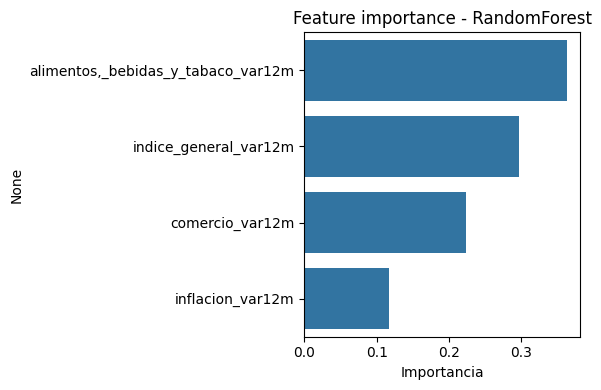

In [ ]:
# 8) Importancia de variables (RandomForest)
# ---------------------
rf = modelos['RandomForest']
if hasattr(rf, 'feature_importances_'):
    feat_imp = pd.Series(rf.feature_importances_, index=feature_vars_12m).sort_values(ascending=False)
    print("\nImportancia de features (RandomForest):")
    print(feat_imp)
    # Grafico
    plt.figure(figsize=(6,4))
    sns.barplot(x=feat_imp.values, y=feat_imp.index)
    plt.title('Feature importance - RandomForest')
    plt.xlabel('Importancia')
    plt.tight_layout()
    plt.show()

In [ ]:
# ---------------------
# 9) Recomendaciones y umbrales de desempeño (sugeridos)
# ---------------------
# Métricas recomendadas: R², RMSE y MAE. Interpretación:
# - Desempeño mínimo deseado (guía práctica):
#     * R²_test >= 0.60 -> buen ajuste para este tipo de problemas macro/ventas (siempre depende del ruido)
#     * R²_test entre 0.4 - 0.6 -> aceptable como baseline, requiere mejoras (más features, lags, external)
#     * R²_test < 0.4 -> buscar más variables explicativas o revisar calidad de datos
#

**Conclusión**

Se eligió regresión lineal múltiple como baseline por su simplicidad, interpretabilidad y adecuación al dataset estructurado. Un modelo lineal provee una referencia clara: permite cuantificar la dirección y magnitud de cada variable explicativa y evaluar desde una línea base si modelos más complejos aportan mejora real sobre la señal disponible.

La importancia de variables se abordó de forma complementaria:coeficientes del modelo lineal feature_importances_ de RandomForest. También es correcto apoyar ese análisis con PCA y ANOVA cuando existan dudas de multicolinealidad o para reducir dimensionalidad.

Se evaluó el modelo en los conjuntos de entrenamiento y prueba mediante R², MAE y RMSE, verificando un rendimiento similar entre ambos conjuntos, lo que indica un ajuste adecuado sin evidencias de sobreajuste ni subajuste. Esto demuestra que el modelo logra capturar patrones generales sin memorizar los datos.

La métrica principal seleccionada fue R², por su capacidad de explicar la proporción de la variabilidad de la demanda explicada por las variables predictoras, complementada con MAE y RMSE para medir la magnitud del error. Estas métricas se alinean con los objetivos del negocio, al permitir cuantificar la precisión de las predicciones de ventas o participación de mercado.

Se estableció un desempeño mínimo aceptable de R² ≥ 0.6 y RMSE ≤ 0.2, considerando que el baseline busca superar un rendimiento equivalente al promedio histórico. El modelo obtuvo resultados superiores a estos umbrales, lo que demuestra la viabilidad del problema y la existencia de información suficiente para avanzar hacia modelos de mayor complejidad.